<h1 style="font-family:Corbel Light; color:#e54b87">Projet 2 : Analysez des données de systèmes éducatifs </h1>

<h2 style="font-family:Corbel Light; color:#737373">Contexte</h2>

Le client, une startup fictive nommée «Academy», propose des cours en ligne niveau lycée et plus. Il a pour projet de développer ses activités à l’internationale et aimerait identifier les pays dans lesquels opérer en priorité. 

<h2 style="font-family:Corbel Light; color:#737373">Mission</h2>

Notre manager nous a confié plusieurs fichiers contenant des milliers d’indicateurs en lien avec l’éducation, récoltés par un organisme de la banque mondiale sur des centaines de pays. 

Notre mission : Mener une analyse pré-exploratoire pour déterminer si le jeu de données a une qualité suffisante pour informer le projet d’expansion de l’entreprise. Si oui, proposer une liste de pays correspondants aux critères du client.

<h2 style="font-family:Corbel Light; color:#737373">Data source</h2>

- données de la banque mondiale : https://datacatalog.worldbank.org/dataset/education-statistics
- infos complémentaires : http://datatopics.worldbank.org/education/

J’ai travaillé avec 3 fichiers : 
- Le fichier principal qui contient toutes les statistiques. C'est ce fichier qu’il va falloir nettoyer et analyser par la suite.
    - Chaque ligne correspond à une combinaison unique pays/indicateur. Nombre de lignes = nombre pays * nombre d’indicateurs
    - Colonnes : code et nom pays / code et nom indicateur / années 
    
    Ex : la première ligne correspond au nombre d'élèves dans le secondaire en Afghanistan de 1970 à 2100

- Le fichier qui contient des informations sur les indicateurs. On va commencer par travailler avec ce fichier pour sélectionner les indicateurs pertinents.
    - Chaque ligne correspond à un indicateur. 
    - Colonnes: code et nom indicateur / définition courte & longue / source / catégorie


- Le fichier qui contient des informations sur les pays. Ce fichier sera utile pour faire des représentations graphiques permettant de visualiser les tendances par région du monde.
    - Chaque ligne correspond à un pays ou une région
    - Colonnes : nom et code pays/ région / devise / catégorie de revenu

<h2 style="font-family:Corbel Light; color:#737373">Requirements</h2>

In [257]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
from matplotlib import pyplot as plt
import missingno as msno
import seaborn as sns
import textwrap
import re

import toolbox

pd.options.display.float_format = '{:_.2f}'.format
%matplotlib inline

In [258]:
python_version = !python -V
print('python version :', python_version,'\n')

print('pandas version : ', pd.__version__, '\n')
print('numpy version : ', np.__version__, '\n')
print('scipy version : ', scipy.__version__, '\n')
print('matplotlib version : ', matplotlib.__version__, '\n')
print('missingno version : ', msno.__version__, '\n')
print('seaborn version : ', sns.__version__, '\n')
print('re version : ', re.__version__)

python version : ['Python 3.9.12'] 

pandas version :  1.4.2 

numpy version :  1.21.5 

scipy version :  1.9.1 

matplotlib version :  3.5.1 

missingno version :  0.5.1 

seaborn version :  0.11.2 

re version :  2.2.1


**Versions utilisées :**

- python : Python 3.9.12
- matplotlib :  3.5.1 
- missingno  :  0.5.1 
- seaborn    :  0.11.2 
- numpy  :  1.21.5 
- pandas :  1.4.2
- scipy  :  1.9.1 
- re     :  2.2.1

***

***

<h1 style="font-family:Corbel Light; color:#737373"><span style="color:#e54b87">Étape 1</span> : Nettoyage  du jeu de données</h1>

***

***

Ce nettoyage, va se faire en 3 temps :
- sélectionner les indicateurs en lien avec notre thématique "identifier les pays dans lesquels proposer des formation en ligne niveau lycée et +".
- analyser la qualité des données et écarter les indicateurs, pays, années avec trop de données manquantes. 
- essayer de deviner les valeurs manquantes restantes pour obtenir un jeu de données propre sur lequel travailler. 

<h2 style="font-family:Corbel; color:#737373">Filtre 1 : Sélection d'indicateurs pertinents (de par leur définition)</h2>

<h3 style="font-family:Corbel Light; color:#737373">1. Inspection des données par fichiers</h3>

#### 1.1 Fichier EdStatsData.csv (jeu de données à nettoyer, contenant toutes les statistiques)

In [259]:
data_education_stats = pd.read_csv('EdStatsData.csv')
# supprime colonne 'Unnamed 69'
data_education_stats.dropna(how='all', axis=1, inplace=True)
list_indicators = data_education_stats['Indicator Name'].unique()

print("Il y a", len(list_indicators), "indicateurs à filtrer")

Il y a 3665 indicateurs à filtrer


In [260]:
data_education_stats.describe(include='all')

Country Name Country Code  \
count        886930       886930   
unique          242          242   
top      Arab World          ARB   
freq           3665         3665   
mean            NaN          NaN   
std             NaN          NaN   
min             NaN          NaN   
25%             NaN          NaN   
50%             NaN          NaN   
75%             NaN          NaN   
max             NaN          NaN   

                                           Indicator Name Indicator Code  \
count                                              886930         886930   
unique                                               3665           3665   
top     Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2   
freq                                                  242            242   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max                                                   NaN            NaN   

                        1970                  1971                  1972  \
count              72_288.00             35_537.00             35_619.00   
unique                   NaN                   NaN                   NaN   
top                      NaN                   NaN                   NaN   
freq                     NaN                   NaN                   NaN   
mean        1_974_772_449.59      4_253_638_470.19      4_592_364_905.26   
std       121_168_685_352.02    180_481_446_225.22    191_408_271_479.83   
min                    -1.44                 -1.59                 -3.06   
25%                     0.89                  8.85                  9.24   
50%                     6.32                 63.16                 66.55   
75%                    62.51             56_552.00             58_636.50   
max    19_039_286_948_196.10 19_864_566_419_298.10 21_009_161_433_401.40   

                        1973                  1974                  1975  ...  \
count              35_545.00             35_730.00             87_306.00  ...   
unique                   NaN                   NaN                   NaN  ...   
top                      NaN                   NaN                   NaN  ...   
freq                     NaN                   NaN                   NaN  ...   
mean        5_105_005_610.89      5_401_492_903.41      2_314_287_511.57  ...   
std       205_917_043_980.68    211_214_985_371.10    137_505_922_744.81  ...   
min                    -4.03                 -4.21                 -3.66  ...   
25%                     9.60                  9.86                  1.40  ...   
50%                    69.70                 70.88                  9.68  ...   
75%                62_029.00             63_836.75                 78.54  ...   
max    22_383_671_023_495.40 22_829_911_729_819.10 23_006_343_161_670.40  ...   

               2055         2060         2065         2070         2075  \
count     51_436.00    51_436.00    51_436.00    51_436.00    51_436.00   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean         714.58       722.49       727.13       728.38       726.65   
std       21_368.51    22_158.45    22_879.90    23_523.38    24_081.49   
min           -1.83        -1.63        -1.44        -1.26        -1.09   
25%            0.03         0.03         0.03         0.02         0.02   
50%            0.23         0.23         0.23         0.23         0.23   
75%            7.50      

#### 1.2 Fichier EdStatsSeries.csv (documentation sur les indicateurs)

Ce fichier répertorie les 3665 indicateurs avec leur documentation
Ces indicateurs sont regroupés en 37 thèmes


Topic     n  f (%)
0                                   Learning Outcomes  1046  28.54
1                                          Attainment   733  20.00
2                                  Education Equality   426  11.62
3                                           Secondary   256   6.98
4                                             Primary   248   6.77
5                                          Population   213   5.81
6                                            Tertiary   158   4.31
7                                            Teachers   137   3.74
8                                        Expenditures    93   2.54
9                 Engaging the Private Sector (SABER)    51   1.39
10                                           Literacy    32   0.87
11                                   Teachers (SABER)    29   0.79
12         School Autonomy and Accountability (SABER)    29   0.79
13                          Early Childhood Education    24   0.65
14   Education Management Information Systems (SABER)    23   0.63
15                        Post-Secondary/Non-Tertiary    19   0.52
16                             School Finance (SABER)    18   0.49
17                         Tertiary Education (SABER)    17   0.46
18                         Student Assessment (SABER)    15   0.41
19                                        Pre-Primary    14   0.38
20                      Health: Population: Structure    13   0.35
21                      Workforce Development (SABER)    12   0.33
22                    Early Child Development (SABER)    12   0.33
23   Social Protection & Labor: Labor force structure    11   0.30
24           School Health and School Feeding (SABER)     9   0.25
25    Economic Policy & Debt: Purchasing power parity     6   0.16
26                                              Laber     3   0.08
27            Social Protection & Labor: Unemployment     3   0.08
28  Economic Policy & Debt: National accounts: US$...     3   0.08
29  Economic Policy & Debt: National accounts: US$...     2   0.05
30                                         Background     2   0.05
31                     Infrastructure: Communications     2   0.05
32                                               EMIS     2   0.05
33  Economic Policy & Debt: National accounts: Atl...     1   0.03
34                               Health: Risk factors     1   0.03
35                                  Health: Mortality     1   0.03
36                       Health: Population: Dynamics     1   0.03

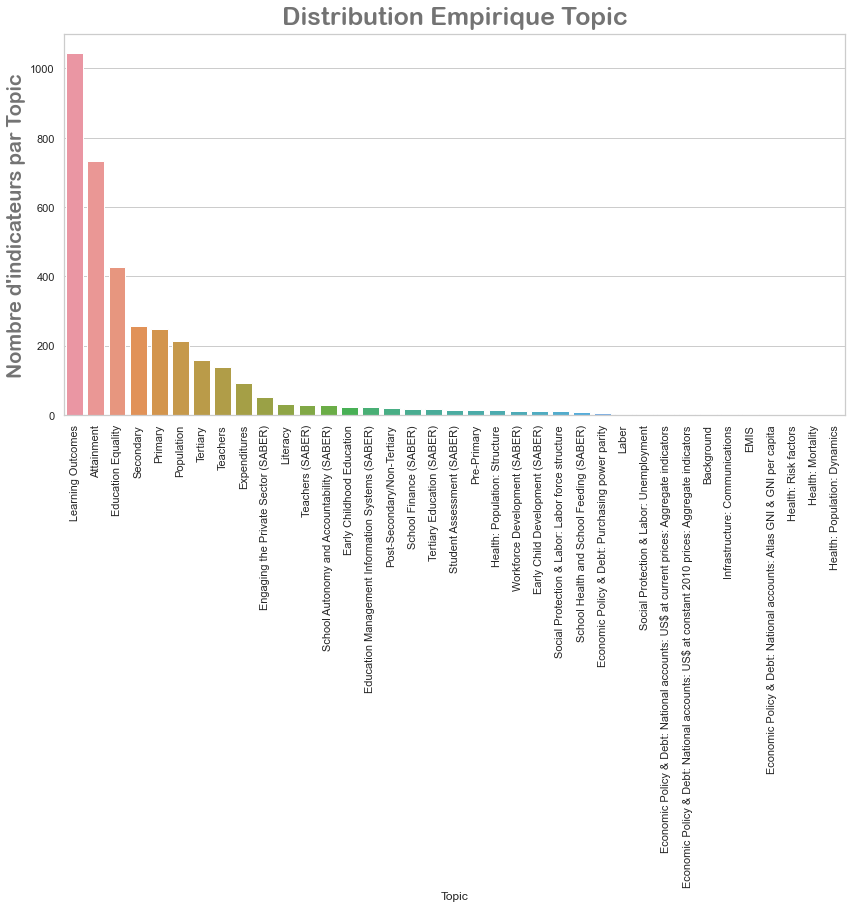

In [262]:
data_indicators = pd.read_csv('EdStatsSeries.csv')

print("Ce fichier répertorie les",
      data_indicators['Indicator Name'].shape[0],
      "indicateurs avec leur documentation")

print("Ces indicateurs sont regroupés en",
      len(data_indicators['Topic'].unique()),
      "thèmes")

toolbox.display_distribution_empirique(data_indicators, 'Topic', True)
indicators_keep = {'Series Code': [], 'Indicator Name': []}

<h3 style="font-family:Corbel Light; color:#737373">2. Inspection des indicateurs "topic par topic"</h3>


Méthodologie : On a 3_665 indicateurs à filtrer en fonction de leur définition, c’est beaucoup, ça peut sembler un peu décourageant au début.
Regroupons les par thème : il y en a 37 et 50 % des indicateurs sont regroupés dans 2 thèmes qui illustrent bien les 2 cas de figures sur lesquels on peut tomber.

- Premier cas de figure : le thème en lui-même ne correspond pas à la problématique. On peut donc supprimer tous les indicateurs de ce thème d’un coup. 

    Ex : le thème "Primaire" (on s’intéresse à l’enseignement secondaire et tertiaire). 
    
- Deuxième cas de figure : le thème correspond à la problématique. Il faut regarder la liste des indicateurs qu’il contient plus en détail. 

    On peut écarter d’office tous les indicateurs qui se concentrent sur un échantillon de la population trop spécifique car on veut des indicateurs un peu plus globaux, on a pas besoin de ce niveau de détail. On peut donc supprimer les indicateurs calculés par genre, par zone d'habitation (milieu rural, urbain), par type d’établissements (privé ou public), par type d’études réalisées (arts, sciences, économies → on ne connaît pas le détail des cours proposés par le client). 
        
    En appliquant ces petits filtres, on obtient des listes d’indicateurs plus faciles à lire et à trier manuellement. 
  Par exemple, sur les 733 indicateurs du thème "niveau de scolarité" il en reste seulement 59 à trier manuellement. 

En procédant de la sorte thème par thème, on réduit notre liste de 3665 indicateurs à 93.
C’est mieux, mais ça reste beaucoup. 
L’objectif étant de retenir 4 à 5 indicateurs pertinents. 

#### 2.1 Topic "Attainment"

In [264]:
subset_attainment = toolbox.get_subset_by_topic(data_indicators, "Attainment")

Topic Attainment 3 sources différentes:

Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/
Wittgenstein Centre for Demography and Global Human Capital: http://www.oeaw.ac.at/vid/dataexplorer/
UNESCO Institute for Statistics


Source    n  f (%)
0  Robert J. Barro and Jong-Wha Lee: http://www.b...  360  49.11
1  Wittgenstein Centre for Demography and Global ...  308  42.02
2                    UNESCO Institute for Statistics   65   8.87

In [265]:
print('Avant traitement il y a',
      subset_attainment['Indicator Name'].shape[0], 'indicateurs')

subset_attainment = toolbox.drop_gender(subset_attainment, 'Indicator Name')
subset_attainment = toolbox.remove_age(subset_attainment, 'Indicator Name')

print('Après traitement il reste',
      len(subset_attainment['Indicator Name without age'].unique()),
      'indicateurs')

Avant traitement il y a 733 indicateurs
Après traitement il reste 59 indicateurs


##### 2.1.1. Inspection des indicateurs source par source

In [266]:
print("Source Barro-Lee :\n")
list_sources_attainment = subset_attainment['Source'].unique()
mask_source = subset_attainment['Source'] == list_sources_attainment[0]
subset_attainment_barro = subset_attainment.loc[mask_source,
                                                ['Indicator Name without age', 'Age']]
print("Chaque indicateur est calculé pour les 15 tranches d'âge suivantes :\n",
      subset_attainment_barro['Age'].unique())

indicators_barro = subset_attainment_barro.drop_duplicates(
    subset='Indicator Name without age', ignore_index=True)
indicators_name = ['Barro-Lee: Percentage of population with secondary schooling. Completed Secondary',
                   'Barro-Lee: Average years of secondary schooling,, total',
                   'Barro-Lee: Percentage of population with tertiary schooling. Completed Tertiary',
                   'Barro-Lee: Percentage of population with tertiary schooling. Total (Incomplete and Completed Tertiary)',
                   'Barro-Lee: Average years of tertiary schooling,, total']

mask_age = subset_attainment['Age'] == ' age 15+'
mask_indicator_name = subset_attainment['Indicator Name without age'].isin(
    indicators_name)
indicators_barro_keep = subset_attainment.loc[(
    mask_indicator_name) & (mask_age), :]

indicators_keep['Indicator Name'].extend(
    list(indicators_barro_keep['Indicator Name']))
indicators_keep['Series Code'].extend(
    list(indicators_barro_keep['Series Code']))

print("\nOn retient les indicateurs suivants: \n", *
      list(indicators_barro_keep['Indicator Name']), sep="\n")

Source Barro-Lee :

Chaque indicateur est calculé pour les 15 tranches d'âge suivantes :
 [' age 15-19' ' age 15+' ' age 20-24' ' age 25-29' ' age 25+' ' age 30-34'
 ' age 35-39' ' age 40-44' ' age 45-49' ' age 50-54' ' age 55-59'
 ' age 60-64' ' age 65-69' ' age 70-74' ' age 75+']

On retient les indicateurs suivants: 

Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary
Barro-Lee: Average years of secondary schooling, age 15+, total
Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary
Barro-Lee: Percentage of population age 15+ with tertiary schooling. Total (Incomplete and Completed Tertiary)
Barro-Lee: Average years of tertiary schooling, age 15+, total


In [267]:
print("Source Wittgenstein Centre for Demography and Global Human Capital :")

mask_source = subset_attainment['Source'] == list_sources_attainment[1]
subset_attainment_wittgenstein = subset_attainment.loc[mask_source, 
                                                       ['Indicator Name without age', 'Age']]
indicators_wittgenstein = subset_attainment_wittgenstein.drop_duplicates(
    subset='Indicator Name without age', ignore_index=True)

indicators_name = ['Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total',
                   'Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total',
                   'Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total',
                   'Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total']

mask_indicator_name = subset_attainment['Indicator Name'].isin(indicators_name)
indicators_wittgenstein_keep = subset_attainment.loc[mask_indicator_name, :]

indicators_keep['Indicator Name'].extend(
    list(indicators_wittgenstein_keep['Indicator Name']))
indicators_keep['Series Code'].extend(
    list(indicators_wittgenstein_keep['Series Code']))

print("\nOn retient les indicateurs suivants: \n", *
      list(indicators_wittgenstein_keep['Indicator Name']), sep="\n")

Source Wittgenstein Centre for Demography and Global Human Capital :

On retient les indicateurs suivants: 

Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total
Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total
Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total
Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total


In [268]:
print("Source UNESCO Institute for Statistics :")

mask_source = subset_attainment['Source'] == list_sources_attainment[2]

subset_attainment_unesco = subset_attainment.loc[mask_source, [
    'Indicator Name without age', 'Age']]
indicators_unesco = subset_attainment_unesco.drop_duplicates(
    subset='Indicator Name without age', ignore_index=True)
print("Chaque indicateur est calculé pour la tranche",
      subset_attainment_unesco['Age'].unique())

indicators_name = ['UIS: Percentage of population age 25+ with completed upper secondary education. Total',
                   'UIS: Percentage of population age 25+ with completed post-secondary education. Total']

mask_indicator_name = subset_attainment['Indicator Name'].isin(indicators_name)
indicators_unesco_keep = subset_attainment.loc[mask_indicator_name, :]

indicators_keep['Indicator Name'].extend(
    list(indicators_unesco_keep['Indicator Name']))
indicators_keep['Series Code'].extend(
    list(indicators_unesco_keep['Series Code']))

print("\nOn retient les indicateurs suivants: \n", *
      list(indicators_unesco_keep['Indicator Name']), sep="\n")

Source UNESCO Institute for Statistics :
Chaque indicateur est calculé pour la tranche [' age 25+']

On retient les indicateurs suivants: 

UIS: Percentage of population age 25+ with completed upper secondary education. Total
UIS: Percentage of population age 25+ with completed post-secondary education. Total


#### 2.2 Topic "Learning Outcomes"

In [269]:
subset_learning_outcomes = toolbox.get_subset_by_topic(data_indicators, 'Learning Outcomes')
# EGRA : résultats exams pour différentes langues (capacité lecture, compréhension orale ...) : garde rien
# Average number of letter names that students could read per minute -> mesure lettrisme (pas besoin detail)

# LLECE : résultats exams (maths et lecture pour niveau CE2 à 6eme) -> garde rien

# PASEC : niveau maths, français -> garde rien

# PIAAC : taux de lettrisme, numérisme ... chez adultes -> garde rien

# IEA/PIRLS : niveau lecture -> garde rien

# PISA : niveau maths, lecture, sciences - > garde rien

# SACMEQ : niveau en maths et autres problèmes numériques -> garde rien

# IEA : niveau en maths et sciences -> garde rien

Topic Learning Outcomes 8 sources différentes:

Early Grade Reading Assessment (EGRA): https://www.eddataglobal.org/reading/
Latin American Laboratory for Assessment of the Quality of Education (LLECE)
Programme d'Analyse des Systèmes Educatifs de la CONFEMEN/Program for the Analysis of CONFEMEN Education Systems (PASEC): http://www.pasec.confemen.org/
OECD Programme for the International Assessment of Adult Competencies (PIAAC)
International Association for the Evaluation of Educational Achievement (IEA) Progress in International Reading Literacy Study (PIRLS)
OECD Programme for International Student Assessment (PISA)
Southern and Eastern Africa Consortium for Monitoring Educational Quality (SACMEQ) Data Archive, www.sacmeq.org
International Association for the Evaluation of Educational Achievement (IEA)'s Trends in International Mathematics and Science Study


Source    n  f (%)
0  Early Grade Reading Assessment (EGRA): https:/...  403  38.53
1  Programme d'Analyse des Systèmes Educatifs de ...  140  13.38
2  Latin American Laboratory for Assessment of th...  127  12.14
3  International Association for the Evaluation o...  100   9.56
4  OECD Programme for International Student Asses...   99   9.46
5  OECD Programme for the International Assessmen...   98   9.37
6  Southern and Eastern Africa Consortium for Mon...   54   5.16
7  International Association for the Evaluation o...   25   2.39

#### 2.3 Topic "Education Equality"

In [270]:
subset_ed_equality = toolbox.get_subset_by_topic(data_indicators, 'Education Equality')

subset_ed_equality = toolbox.drop_gender(subset_ed_equality, 'Indicator Name')
subset_ed_equality = toolbox.drop_area(subset_ed_equality, 'Indicator Name')
subset_ed_equality = toolbox.drop_quintile(subset_ed_equality, 'Indicator Name')

Topic Education Equality 4 sources différentes:

Demographic and Health Surveys (DHS)
World Bank staff calculations based on Multiple Indicator Cluster Survey (MICS) data
Multiple Indicator Cluster Surveys (MICS)
UNESCO Institute for Statistics


Source    n  f (%)
0                    UNESCO Institute for Statistics  176  41.31
1               Demographic and Health Surveys (DHS)  130  30.52
2  World Bank staff calculations based on Multipl...   60  14.08
3          Multiple Indicator Cluster Surveys (MICS)   60  14.08

##### 2.3.1. Inspection des indicateurs source par source

In [271]:
print("Demographic and Health Surveys:")

mask_source = subset_ed_equality['Source'] == subset_ed_equality['Source'].unique()[0]
subset_ed_quality_dhs = subset_ed_equality.loc[mask_source, :]

indicators_name = ['DHS: Gross attendance rate. Post Secondary',
                   'DHS: Net attendance rate. Secondary',
                   'DHS: Secondary completion rate']

indicators_dhs_keep = subset_ed_quality_dhs.loc[subset_ed_quality_dhs['Indicator Name'].isin(
    indicators_name)]


indicators_keep['Indicator Name'].extend(
    list(indicators_dhs_keep['Indicator Name']))
indicators_keep['Series Code'].extend(list(indicators_dhs_keep['Series Code']))

print("\nOn retient les indicateurs suivants: \n", *
      list(indicators_dhs_keep['Indicator Name']), sep="\n")

Demographic and Health Surveys:

On retient les indicateurs suivants: 

DHS: Gross attendance rate. Post Secondary
DHS: Net attendance rate. Secondary
DHS: Secondary completion rate


In [272]:
print("World Bank staff calculations based on Multiple Indicator Cluster Survey (MICS):")

mask_source = subset_ed_equality['Source'] == subset_ed_equality['Source'].unique()[1]

subset_ed_quality_mics = subset_ed_equality.loc[mask_source, :]
indicators_name = ['MICS: Gross attendance rate. Post Secondary',
                   'MICS: Net attendance rate. Secondary',
                   'MICS: Secondary completion rate']

indicators_mics_keep = subset_ed_quality_mics.loc[subset_ed_quality_mics['Indicator Name'].isin(
    indicators_name)]

indicators_keep['Indicator Name'].extend(
    list(indicators_mics_keep['Indicator Name']))
indicators_keep['Series Code'].extend(
    list(indicators_mics_keep['Series Code']))

print("\nOn retient les indicateurs suivants: \n", *
      list(indicators_mics_keep['Indicator Name']), sep="\n")

World Bank staff calculations based on Multiple Indicator Cluster Survey (MICS):

On retient les indicateurs suivants: 

MICS: Gross attendance rate. Post Secondary
MICS: Net attendance rate. Secondary
MICS: Secondary completion rate


In [273]:
# Multiple Indicator Cluster Surveys (MICS) même indicateurs que MICS précédent mais que quintile -> garde rien

# UNESCO Institute for Statistics -> Garde aucun car concerne "primary" ou "lower secondary"

#### 2.4. Topic "Primary"

In [274]:
subset_primary = get_subset_by_topic(data_indicators, 'Primary')

# Garde rien car concerne enseignement primaire (on s'interesse au secondaire et tertiaire)

Topic Primary 1 seule source:

UNESCO Institute for Statistics


Source    n  f (%)
0  UNESCO Institute for Statistics  248 100.00

#### 2.5 Topic "Secondary"

In [275]:
subset_secondary = toolbox.get_subset_by_topic(data_indicators, 'Secondary')

subset_secondary = toolbox.drop_gender(subset_secondary, 'Indicator Name')
subset_secondary = toolbox.drop_education_details(
    subset_secondary, 'Indicator Name')

indicators_name = ['Enrolment in secondary education, both sexes (number)',
                   'Gross enrolment ratio, secondary, both sexes (%)',
                   'Net enrolment rate, secondary, both sexes (%)',
                   'Gross enrolment ratio, upper secondary, both sexes (%)',
                   'Enrolment in upper secondary education, both sexes (number)',
                   'Net enrolment rate, upper secondary, both sexes (%)',
                   'Adjusted net enrolment rate, upper secondary, both sexes (%)']

indicators_secondary_keep = subset_secondary.loc[subset_secondary['Indicator Name'].isin(
    indicators_name)]

indicators_keep['Indicator Name'].extend(
    list(indicators_secondary_keep['Indicator Name']))
indicators_keep['Series Code'].extend(
    list(indicators_secondary_keep['Series Code']))

print("\nOn retient les indicateurs suivants: \n", *
      list(indicators_secondary_keep['Indicator Name']), sep="\n")

Topic Secondary 1 seule source:

UNESCO Institute for Statistics


Source    n  f (%)
0  UNESCO Institute for Statistics  256 100.00


On retient les indicateurs suivants: 

Enrolment in secondary education, both sexes (number)
Gross enrolment ratio, secondary, both sexes (%)
Gross enrolment ratio, upper secondary, both sexes (%)
Net enrolment rate, secondary, both sexes (%)
Enrolment in upper secondary education, both sexes (number)
Net enrolment rate, upper secondary, both sexes (%)
Adjusted net enrolment rate, upper secondary, both sexes (%)


#### 2.6 Topic "Tertiary"

In [276]:
subset_tertiary = toolbox.get_subset_by_topic(data_indicators, 'Tertiary')

subset_tertiary = toolbox.drop_gender(subset_tertiary, 'Indicator Name')
subset_tertiary = toolbox.drop_education_details(
    subset_tertiary, 'Indicator Name')

indicators_name = ['School life expectancy, primary to tertiary, both sexes (years)',
                   'Enrolment in tertiary education, all programmes, both sexes (number)',
                   'Gross enrolment ratio, tertiary, both sexes (%)',
                   'Enrolment in post-secondary non-tertiary education, both sexes (number)',
                   'School life expectancy, tertiary, both sexes (years)',
                   'Enrolment in tertiary education per 100,000 inhabitants, both sexes']

indicators_tertiary_keep = subset_tertiary.loc[subset_tertiary['Indicator Name'].isin(
    indicators_name)]

indicators_keep['Indicator Name'].extend(
    list(indicators_tertiary_keep['Indicator Name']))
indicators_keep['Series Code'].extend(
    list(indicators_tertiary_keep['Series Code']))

print("\nOn retient les indicateurs suivants: \n", *
      list(indicators_tertiary_keep['Indicator Name']), sep="\n")

Topic Tertiary 1 seule source:

UNESCO Institute for Statistics


Source    n  f (%)
0  UNESCO Institute for Statistics  158 100.00


On retient les indicateurs suivants: 

School life expectancy, primary to tertiary, both sexes (years)
Enrolment in tertiary education, all programmes, both sexes (number)
Gross enrolment ratio, tertiary, both sexes (%)
Enrolment in post-secondary non-tertiary education, both sexes (number)
School life expectancy, tertiary, both sexes (years)
Enrolment in tertiary education per 100,000 inhabitants, both sexes


#### 2.7. Topic "Population"

In [277]:
subset_population = toolbox.get_subset_by_topic(data_indicators, 'Population')

#Statistiques sur age de la population -> garde pas

Topic Population 3 sources différentes:

UNESCO Institute for Statistics (Derived)
UNESCO Institute for Statistics.
UNESCO Institute for Statistics


Source    n  f (%)
0  UNESCO Institute for Statistics (Derived)  102  47.89
1            UNESCO Institute for Statistics   59  27.70
2           UNESCO Institute for Statistics.   52  24.41

#### 2.8. Topic "Teachers"

In [278]:
subset_teachers = toolbox.get_subset_by_topic(data_indicators, 'Teachers')

# Statistiques sur salaire prof, ratio prof/éleve, profs en formation ... -> ne garde aucune

Topic Teachers 2 sources différentes:

Organisation for Economic Co-operation and Development (OECD)
UNESCO Institute for Statistics


Source    n  f (%)
0                    UNESCO Institute for Statistics  121  88.32
1  Organisation for Economic Co-operation and Dev...   16  11.68

#### 2.9 Topic "Expenditures"

In [279]:
subset_expenditures = toolbox.get_subset_by_topic(data_indicators, 'Expenditures')

indicators_name = ['Government expenditure per secondary student as % of GDP per capita (%)',
                   'Government expenditure per tertiary student as % of GDP per capita (%)',
                   'Expenditure on education as % of total government expenditure (%)',
                   'Government expenditure on education as % of GDP (%)',
                   'Government expenditure on secondary education as % of GDP (%)',
                   'Government expenditure on tertiary education as % of GDP (%)',
                   'Expenditure on secondary as % of total government expenditure (%)',
                   'Expenditure on upper secondary as % of total government expenditure (%)',
                   'Expenditure on tertiary as % of total government expenditure (%)',
                   'Government expenditure per upper secondary student as % of GDP per capita (%)',
                   'Government expenditure per secondary student (PPP$)',
                   'Government expenditure per upper secondary student (PPP$)',
                   'Government expenditure per tertiary student (PPP$)',
                   'Government expenditure per secondary student (constant PPP$)',
                   'Government expenditure per upper secondary student (constant PPP$)',
                   'Government expenditure per secondary student (US$)',
                   'Government expenditure per upper secondary student (US$)',
                   'Government expenditure per tertiary student (US$)',
                   'Government expenditure per secondary student (constant US$)',
                   'Government expenditure per upper secondary student (constant US$)',
                   'Government expenditure per tertiary student (constant US$)',
                   'Government expenditure in secondary institutions education as % of GDP (%)',
                   'Government expenditure in tertiary institutions as % of GDP (%)']

indicators_expenditures_keep = subset_expenditures.loc[subset_expenditures['Indicator Name'].isin(indicators_name)]

indicators_keep['Indicator Name'].extend(list(indicators_expenditures_keep['Indicator Name']))
indicators_keep['Series Code'].extend(list(indicators_expenditures_keep['Series Code']))

print("\nOn retient les indicateurs suivants: \n", *list(indicators_expenditures_keep['Indicator Name']), sep = "\n")

Topic Expenditures 1 seule source:

UNESCO Institute for Statistics


Source   n  f (%)
0  UNESCO Institute for Statistics  93 100.00


On retient les indicateurs suivants: 

Government expenditure per secondary student as % of GDP per capita (%)
Government expenditure per tertiary student as % of GDP per capita (%)
Expenditure on education as % of total government expenditure (%)
Government expenditure on education as % of GDP (%)
Government expenditure on secondary education as % of GDP (%)
Government expenditure on tertiary education as % of GDP (%)
Expenditure on secondary as % of total government expenditure (%)
Expenditure on upper secondary as % of total government expenditure (%)
Expenditure on tertiary as % of total government expenditure (%)
Government expenditure per upper secondary student as % of GDP per capita (%)
Government expenditure per secondary student (PPP$)
Government expenditure per upper secondary student (PPP$)
Government expenditure per tertiary student (PPP$)
Government expenditure per secondary student (constant PPP$)
Government expenditure per upper secondary student (constant PPP$)
Govern

#### 2.10 Topic "Engaging the Private Sector(SABER)"

In [280]:
subset_saber = toolbox.get_subset_by_topic(
    data_indicators, 'Engaging the Private Sector (SABER)')

mask_goal = subset_saber['Indicator Name'].str.contains(
    'Goal 4|Goal 8', case=False)
indicators_saber_keep = subset_saber.loc[mask_goal, :].copy()

indicators_keep['Indicator Name'].extend(
    list(indicators_saber_keep['Indicator Name']))
indicators_keep['Series Code'].extend(
    list(indicators_saber_keep['Series Code']))

print("\nOn retient les indicateurs suivants: \n", *
      list(indicators_saber_keep['Indicator Name']), sep="\n")

Topic Engaging the Private Sector (SABER) 1 seule source:

Systems Approach for Better Education Results (SABER), World Bank


Source   n  f (%)
0  Systems Approach for Better Education Results ...  51 100.00


On retient les indicateurs suivants: 

SABER: (Engaging the Private Sector, Government funded) Policy Goal 8: Promoting diversity of supply
SABER: (Engaging the Private Sector, Government funded) Policy Goal 8 Lever 1: Ownership
SABER: (Engaging the Private Sector, Government funded) Policy Goal 8 Lever 2: Certification standards
SABER: (Engaging the Private Sector, Government funded) Policy Goal 8 Lever 3: Market entry information
SABER: (Engaging the Private Sector, Government funded) Policy Goal 8 Lever 4: Regulatory fees
SABER: (Engaging the Private Sector, Government funded) Policy Goal 8 Lever 5: Funding
SABER: (Engaging the Private Sector, Government funded) Policy Goal 8 Lever 6: Incentives
SABER: (Engaging the Private Sector, Government funded) Policy Goal 8 Lever 7: Planning
SABER: (Engaging the Private Sector) Policy Goal 4: Promoting diversity of supply
SABER: (Engaging the Private Sector) Policy Goal 4 Lever 1: Tuition fees
SABER: (Engaging the Private Sector) Policy Goal

#### 2.11. Topic "Literacy"

In [281]:
#Taux d'alphabétisation - > garde rien

subset_literacy = toolbox.get_subset_by_topic(data_indicators, 'Literacy')

Topic Literacy 1 seule source:

UNESCO Institute for Statistics


Source   n  f (%)
0  UNESCO Institute for Statistics  32 100.00

#### 2.12 Topic "Teachers (SABER)"

In [282]:
subset_teachers_saber = toolbox.get_subset_by_topic(data_indicators, 'Teachers (SABER)')

# On ne garde rien (sur condition travail des enseignants, opportunités de carrière, formations pour devenir enseignant)

Topic Teachers (SABER) 1 seule source:

Systems Approach for Better Education Results (SABER), World Bank


Source   n  f (%)
0  Systems Approach for Better Education Results ...  29 100.00

#### 2.13 Topic "School Autonomy and Accountability (SABER)"

In [283]:
subset_school_autonomy_saber = toolbox.get_subset_by_topic(data_indicators, 'School Autonomy and Accountability (SABER)')

# On ne garde rien (sur autonomie des écoles à prendre des décisions, choisir profs, budget)

Topic School Autonomy and Accountability (SABER) 1 seule source:

Systems Approach for Better Education Results (SABER), World Bank


Source   n  f (%)
0  Systems Approach for Better Education Results ...  29 100.00

#### 2.14 Topic "Early Childhood Education"

In [284]:
subset_early_childhood = toolbox.get_subset_by_topic(data_indicators, 'Early Childhood Education')

# On ne garde rien (s'interesse à enseignement secondaire et tertiaire)

Topic Early Childhood Education 1 seule source:

UNESCO Institute for Statistics


Source   n  f (%)
0  UNESCO Institute for Statistics  24 100.00

#### 2.15 Topic "Education Management Information Systems (SABER)"

In [285]:
subset_emis_saber = toolbox.get_subset_by_topic(data_indicators, 'Education Management Information Systems (SABER)')

# with EMIS governments are able to analyze and utilize data to improve their education systems
# Capacité du pays à collecter des données de qualité sur l'éducation (qualité des données collectées, 
# état des infrastructures qui collectent données etc ...) -> On ne garde rien

Topic Education Management Information Systems (SABER) 1 seule source:

Systems Approach for Better Education Results (SABER), World Bank


Source   n  f (%)
0  Systems Approach for Better Education Results ...  23 100.00

#### 2.16 Topic "Post-Secondary/Non-Tertiary"

In [286]:
subset_non_tertiary = toolbox.get_subset_by_topic(
    data_indicators, 'Post-Secondary/Non-Tertiary')

subset_non_tertiary = toolbox.drop_gender(
    subset_non_tertiary, 'Indicator Name')
subset_non_tertiary = toolbox.drop_education_details(
    subset_non_tertiary, 'Indicator Name')

indicators_keep['Indicator Name'].extend(
    list(subset_non_tertiary['Indicator Name']))
indicators_keep['Series Code'].extend(list(subset_non_tertiary['Series Code']))

print("\nOn retient les indicateurs suivants: \n", *
      list(subset_non_tertiary['Indicator Name']), sep="\n")

Topic Post-Secondary/Non-Tertiary 1 seule source:

UNESCO Institute for Statistics


Source   n  f (%)
0  UNESCO Institute for Statistics  19 100.00


On retient les indicateurs suivants: 

Gross enrolment ratio, post-secondary non-tertiary, both sexes (%)
School life expectancy, post-secondary non-tertiary, both sexes (years)


#### 2.17 Topic "School Finance (SABER)"

In [287]:
subset_school_finance_saber = toolbox.get_subset_by_topic(data_indicators, 'School Finance (SABER)')

# Comment ressources distribuées (fournitures de base, aides aux élèves plus pauvres ...) -> Garde rien

Topic School Finance (SABER) 1 seule source:

Systems Approach for Better Education Results (SABER), World Bank


Source   n  f (%)
0  Systems Approach for Better Education Results ...  18 100.00

#### 2.18 Topic "Tertiary Education (SABER)"

In [288]:
subset_tertiary_saber = toolbox.get_subset_by_topic(
    data_indicators, 'Tertiary Education (SABER)')

indicators_keep['Indicator Name'].extend(
    list(subset_tertiary_saber['Indicator Name']))
indicators_keep['Series Code'].extend(
    list(subset_tertiary_saber['Series Code']))

print("\nOn retient les indicateurs suivants: \n", *
      list(subset_tertiary_saber['Indicator Name']), sep="\n")

# On garde tout pour l'instant (verra si beaucoup de trou)

Topic Tertiary Education (SABER) 1 seule source:

Systems Approach for Better Education Results (SABER), World Bank


Source   n  f (%)
0  Systems Approach for Better Education Results ...  17 100.00


On retient les indicateurs suivants: 

SABER: (Tertiary Education) Policy Goal 1: Vision for Tertiary Education
SABER: (Tertiary Education) Policy Goal 1 Lever 1: Clear vision
SABER: (Tertiary Education) Policy Goal 2: Regulatory Framework for Tertiary Education
SABER: (Tertiary Education) Policy Goal 2 Lever 1: Steering the system
SABER: (Tertiary Education) Policy Goal 3: Governance
SABER: (Tertiary Education) Policy Goal 3 Lever 1: Articulation
SABER: (Tertiary Education) Policy Goal 3 Lever 2: Institutional autonomy
SABER: (Tertiary Education) Policy Goal 4: Finance
SABER: (Tertiary Education) Policy Goal 4 Lever 1: Coverage of resource allocation
SABER: (Tertiary Education) Policy Goal 4 Lever 2: Resource allocation
SABER: (Tertiary Education) Policy Goal 4 Lever 3: Resource utilization (Equity)
SABER: (Tertiary Education) Policy Goal 5: Quality Assurance
SABER: (Tertiary Education) Policy Goal 5 Lever 1: Accreditation and Institutional Quality Standards
SABER: (Tertiary Educatio

#### 2.19 Topic "Student Assessment (SABER)"

In [289]:
subset_student_assessment_saber = toolbox.get_subset_by_topic(data_indicators, 'Student Assessment (SABER)')

# The assessments provide information on whether all students in an education system are learning and how well
# Garde rien

Topic Student Assessment (SABER) 1 seule source:

Systems Approach for Better Education Results (SABER), World Bank


Source   n  f (%)
0  Systems Approach for Better Education Results ...  15 100.00

#### 2.20 Topic Pre-Primary

In [290]:
subset_preprimary = toolbox.get_subset_by_topic(data_indicators, 'Pre-Primary')

# Garde rien car s'interesse au secondaire et tertiaire

Topic Pre-Primary 1 seule source:

UNESCO Institute for Statistics


Source   n  f (%)
0  UNESCO Institute for Statistics  14 100.00

#### 2.21 Topic Health: Population: Structure

In [291]:
subset_health_structure = toolbox.get_subset_by_topic(data_indicators, 'Health: Population: Structure')

# Structure de la population (% de 0-14 ans, population totale, % femmes etc ...) -> garde rien

Topic Health: Population: Structure 3 sources différentes:

World Bank staff estimates using the World Bank's total population and age/sex distributions of the United Nations Population Division's World Population Prospects.
World Bank staff estimates based on age/sex distributions of United Nations Population Division's World Population Prospects.
(1) United Nations Population Division. World Population Prospects, (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Report (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme.


Source  n  f (%)
0  World Bank staff estimates using the World Ban...  8  61.54
1  World Bank staff estimates based on age/sex di...  4  30.77
2  (1) United Nations Population Division. World ...  1   7.69

#### 2.22 Topic "Workforce Development (SABER)"

In [292]:
subset_workforce_saber = toolbox.get_subset_by_topic(
    data_indicators, 'Workforce Development (SABER)')
indicators_name = ['SABER: (Workforce Development) Policy Goal 3: Service Delivery',
                   'SABER: (Workforce Development) Policy Goal 3 Lever 1: Enabling Diversity and Excellence in Training Provision',
                   'SABER: (Workforce Development) Policy Goal 3 Lever 3: Enhancing Evidence-based Accountability for Results']

indicators_workforce_saber_keep = subset_workforce_saber.loc[subset_workforce_saber['Indicator Name'].isin(
    indicators_name)]

indicators_keep['Indicator Name'].extend(
    list(indicators_workforce_saber_keep['Indicator Name']))
indicators_keep['Series Code'].extend(
    list(indicators_workforce_saber_keep['Series Code']))

print("\nOn retient les indicateurs suivants: \n", *
      list(indicators_workforce_saber_keep['Indicator Name']), sep="\n")

# Effectiveness of education and training systems in generating skills demanded by employers
# Encourage and regulate nonstate provision of training

Topic Workforce Development (SABER) 1 seule source:

Systems Approach for Better Education Results (SABER), World Bank


Source   n  f (%)
0  Systems Approach for Better Education Results ...  12 100.00


On retient les indicateurs suivants: 

SABER: (Workforce Development) Policy Goal 3: Service Delivery
SABER: (Workforce Development) Policy Goal 3 Lever 1: Enabling Diversity and Excellence in Training Provision
SABER: (Workforce Development) Policy Goal 3 Lever 3: Enhancing Evidence-based Accountability for Results


#### 2.23 Topic "Early Child Development (SABER)"

In [293]:
subset_earlychild_saber = toolbox.get_subset_by_topic(data_indicators, 'Early Child Development (SABER)')

# On garde rien car s'interesse lycéens et étudiants

Topic Early Child Development (SABER) 1 seule source:

Systems Approach for Better Education Results (SABER), World Bank


Source   n  f (%)
0  Systems Approach for Better Education Results ...  12 100.00

#### 2.24 Topic "Social Protection & Labor: Labor force structure"

In [294]:
subset_laborforce = toolbox.get_subset_by_topic(
    data_indicators, 'Social Protection & Labor: Labor force structure')

subset_laborforce = toolbox.drop_gender(subset_laborforce, 'Indicator Name')
indicators_name = ['Labor force with advanced education (% of total working-age population with advanced education)',
                   'Labor force with intermediate education (% of total working-age population with intermediate education)']

indicators_laborforce_keep = subset_laborforce.loc[subset_laborforce['Indicator Name'].isin(
    indicators_name)]

indicators_keep['Indicator Name'].extend(
    list(indicators_laborforce_keep['Indicator Name']))
indicators_keep['Series Code'].extend(
    list(indicators_laborforce_keep['Series Code']))

print("\nOn retient les indicateurs suivants: \n", *
      list(indicators_laborforce_keep['Indicator Name']), sep="\n")

Topic Social Protection & Labor: Labor force structure 2 sources différentes:

International Labour Organization, ILOSTAT database. Data retrieved in March 2017.
Derived using data from International Labour Organization, ILOSTAT database and World Bank population estimates. Labor data retrieved in November 2017.


Source  n  f (%)
0  International Labour Organization, ILOSTAT dat...  9  81.82
1  Derived using data from International Labour O...  2  18.18


On retient les indicateurs suivants: 

Labor force with advanced education (% of total working-age population with advanced education)
Labor force with intermediate education (% of total working-age population with intermediate education)


#### 2.25 Topic "School Health and School Feeding (SABER)"

In [295]:
subset_school_health_saber = toolbox.get_subset_by_topic(data_indicators, 'School Health and School Feeding (SABER)')

# Documents + analyzes school health programs for children of school age and helps governments strengthen these programs.
# Poor health and hunger both reduce attendance and hamper learning in school
# Garde aucun

Topic School Health and School Feeding (SABER) 1 seule source:

Systems Approach for Better Education Results (SABER), World Bank


Source  n  f (%)
0  Systems Approach for Better Education Results ...  9 100.00

#### 2.26 Topic Economic Policy & Debt: Purchasing power parity


In [296]:
subset_ppp = toolbox.get_subset_by_topic(data_indicators, 'Economic Policy & Debt: Purchasing power parity')

# Purchasing Power Parity GDP
# Garde aucun

Topic Economic Policy & Debt: Purchasing power parity 1 seule source:

World Bank, International Comparison Program database.


Source  n  f (%)
0  World Bank, International Comparison Program d...  6 100.00

#### 2.27 Topic Laber

In [297]:
subset_laber = toolbox.get_subset_by_topic(data_indicators, 'Laber')

# Share of youth not in education, employment or training -> Garde aucun

Topic Laber 1 seule source:

International Labour Organization, Key Indicators of the Labour Market database.


Source  n  f (%)
0  International Labour Organization, Key Indicat...  3 100.00

#### 2.28 Topic Social Protection & Labor: Unemployment

In [298]:
subset_unemployment = toolbox.get_subset_by_topic(data_indicators, 'Social Protection & Labor: Unemployment')

# % Unemployment -> Garde aucun

Topic Social Protection & Labor: Unemployment 1 seule source:

International Labour Organization, ILOSTAT database. Data retrieved in November 2017.


Source  n  f (%)
0  International Labour Organization, ILOSTAT dat...  3 100.00

#### 2.29 Topic Economic Policy & Debt National accounts US dollar at current prices Aggregate indicators

In [299]:
subset_eco_current = toolbox.get_subset_by_topic(data_indicators, 'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators')

# GDP , GDP per capita, GNI - > garde aucun

Topic Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators 1 seule source:

World Bank national accounts data, and OECD National Accounts data files.


Source  n  f (%)
0  World Bank national accounts data, and OECD Na...  3 100.00

#### 2.30 Topic "Economic Policy & Debt: National accounts: US dollars at constant 2010 prices: Aggregate indicators"

In [300]:
subset_eco_2010 = toolbox.get_subset_by_topic(data_indicators, 'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators')

# GDP , GDP per capita - > garde aucun

Topic Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators 1 seule source:

World Bank national accounts data, and OECD National Accounts data files.


Source  n  f (%)
0  World Bank national accounts data, and OECD Na...  2 100.00

#### 2.31 Topic "Background"

In [301]:
subset_background = toolbox.get_subset_by_topic(data_indicators, 'Background')

# Nb d'années école obligatoire, age officiel d'entrée à l'école - > garde aucun

Topic Background 1 seule source:

UNESCO Institute for Statistics


Source  n  f (%)
0  UNESCO Institute for Statistics  2 100.00

#### 2.32 Topic "Infrastructure: Communications"

In [302]:
subset_communication = toolbox.get_subset_by_topic(
    data_indicators, 'Infrastructure: Communications')
subset_communication['Indicator Name'].head()

indicators_keep['Indicator Name'].extend(
    list(subset_communication['Indicator Name']))
indicators_keep['Series Code'].extend(
    list(subset_communication['Series Code']))

print("\nOn retient les indicateurs suivants: \n", *
      list(subset_communication['Indicator Name']), sep="\n")

# Garde les deux, cours en ligne

Topic Infrastructure: Communications 1 seule source:

International Telecommunication Union, World Telecommunication/ICT Development Report and database.


Source  n  f (%)
0  International Telecommunication Union, World T...  2 100.00


On retient les indicateurs suivants: 

Personal computers (per 100 people)
Internet users (per 100 people)


#### 2.33 Topic EMIS

In [303]:
subset_emis = toolbox.get_subset_by_topic(data_indicators, 'EMIS')

# Pourcentage des questionnaires rendus contenant données utilisables enregistré dans système EMIS
# Garde rien

Topic EMIS 1 seule source:

UNESCO Institute for Statistics


Source  n  f (%)
0  UNESCO Institute for Statistics  2 100.00

#### 2.34 Topic Economic Policy & Debt National accounts Atlas GNI & GNI per capita

In [304]:
subset_gni = toolbox.get_subset_by_topic(data_indicators, 
                                         'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita')
subset_gni['Indicator Name'].head()

# Garde rien

Topic Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita 1 seule source:

World Bank national accounts data, and OECD National Accounts data files.


Source  n  f (%)
0  World Bank national accounts data, and OECD Na...  1 100.00

1668    GNI per capita, Atlas method (current US$)
Name: Indicator Name, dtype: object

#### 2.35 Topic Health: Risk factors

In [305]:
subset_health_risk = toolbox.get_subset_by_topic(data_indicators, 'Health: Risk factors')
subset_health_risk['Indicator Name'].head()

# Garde rien

Topic Health: Risk factors 1 seule source:

UNAIDS estimates.


Source  n  f (%)
0  UNAIDS estimates.  1 100.00

2382    Prevalence of HIV, total (% of population ages...
Name: Indicator Name, dtype: object

#### 2.36 Topic Health: Mortality

In [306]:
subset_health_mortality = toolbox.get_subset_by_topic(data_indicators, 'Health: Mortality')
subset_health_mortality['Indicator Name'].head()

# Garde rien

Topic Health: Mortality 1 seule source:

Estimates Developed by the UN Inter-agency Group for Child Mortality Estimation (UNICEF, WHO, World Bank, UN DESA Population Division) at www.childmortality.org.


Source  n  f (%)
0  Estimates Developed by the UN Inter-agency Gro...  1 100.00

2383    Mortality rate, under-5 (per 1,000 live births)
Name: Indicator Name, dtype: object

#### 2.37 Topic Health: Population: Dynamics

In [307]:
subset_health_population = toolbox.get_subset_by_topic(data_indicators, 'Health: Population: Dynamics')
subset_health_population['Indicator Name'].head()
# Garde rien

Topic Health: Population: Dynamics 1 seule source:

Derived from total population. Population source: (1) United Nations Population Division. World Population Prospects, (2) Census reports and other statistical publications from national statistical offices, (3) Eurostat: Demographic Statistics, (4) United Nations Statistical Division. Population and Vital Statistics Reprot (various years), (5) U.S. Census Bureau: International Database, and (6) Secretariat of the Pacific Community: Statistics and Demography Programme.


Source  n  f (%)
0  Derived from total population. Population sour...  1 100.00

2589    Population growth (annual %)
Name: Indicator Name, dtype: object

<h3 style="font-family:Corbel Light; color:#737373">3. Indicateurs retenus après premier filtre</h3>

In [308]:
relevant_indicators = pd.DataFrame.from_dict(indicators_keep, orient='columns')
relevant_indicators.shape

(93, 2)

<h2 style="font-family:Corbel; color:#737373">Filtre 2 : Analyse de la qualité des données (valeurs manquantes) </h2>

Ce filtre porte sur la qualité des données, on va supprimer les entrées qui n’ont pas suffisamment de valeurs.

<h3 style="font-family:Corbel Light; color:#737373">1. Inspection des données</h3>

On retire du jeu de données les individus correspondant à des régions et les pays sans aucune donnée

In [315]:
mask_indicator = data_education_stats['Indicator Code'].isin(
    relevant_indicators['Series Code'])
data_education_stats_subset = data_education_stats.loc[mask_indicator, :]

data_education_stats_subset = toolbox.drop_region(
    data_education_stats_subset, 'Country Name')
data_education_stats_subset = toolbox.drop_countries_by_threshold(
    data_education_stats_subset, 100)
data_education_stats_subset = toolbox.drop_indicators_by_threshold(
    data_education_stats_subset, 100)

print("\nFormat du jeu de données :", data_education_stats_subset.shape)

3 pays supprimé(s)
Il reste 214 pays

          Dropped countries
0           Channel Islands
1               Isle of Man
2  St. Martin (French part) 

0 indicateur(s) supprimé(s)
Il reste 93 indicateurs

Format du jeu de données : (19902, 69)


<h3 style="font-family:Corbel Light; color:#737373">2. Suppression des années peu pertinentes ou avec trop peu de données</h3>

#### 2.1 On retire les années avant 2000 (cours en ligne, technologies plus récentes)

On cherche à déterminer quelle période retenir pour faire notre analyse.
On regarde donc, pour chaque indicateur, sur quelle plage de temps des valeurs sont disponibles (première année avec une valeur et dernière année avec une valeur).

In [316]:
data_education_stats_subset = toolbox.drop_years_before(data_education_stats_subset, 2000)

time_frame = toolbox.get_first_last_year_with_value(data_education_stats_subset)
time_frame.head()

first year with value   n  f (%)
0                  2000  52  55.91
1                  2017  17  18.28
2                  2015   8   8.60
3                  2014   5   5.38
4                  2010   4   4.30
5                  2005   3   3.23
6                  2012   3   3.23
7                  2016   1   1.08

last year with value   n  f (%)
0                 2016  25  26.88
1                 2015  21  22.58
2                 2014  19  20.43
3                 2017  17  18.28
4                 2010   5   5.38
5                 2100   4   4.30
6                 2012   1   1.08
7                 2009   1   1.08

first year with value  \
Indicator Name                                                             
Adjusted net enrolment rate, upper secondary, b...                  2000   
Barro-Lee: Average years of secondary schooling...                  2000   
Barro-Lee: Average years of tertiary schooling,...                  2000   
Barro-Lee: Percentage of population age 15+ wit...                  2000   
Barro-Lee: Percentage of population age 15+ wit...                  2000   

                                                   last year with value  
Indicator Name                                                           
Adjusted net enrolment rate, upper secondary, b...                 2015  
Barro-Lee: Average years of secondary schooling...                 2010  
Barro-Lee: Average years of tertiary schooling,...                 2010  
Barro-Lee: Percentage of population age 15+ wit...                 2010  
Barro-Lee: Percentage of population age 15+ wit...                 2010

#### 2.2  On retire les années après 2017

On supprime les indicateurs de projection (données futures jusqu'en 2100, en décalage avec les autres indicateurs) et les années après 2017 (dernière année avec des valeurs pour les indicateurs restants)

In [317]:
data_education_stats_subset = toolbox.drop_indicator(data_education_stats_subset, ['Projection'], True)
data_education_stats_subset = toolbox.drop_years_after(data_education_stats_subset, 2017)

4 indicateur(s) supprimé(s)
Il reste 89 indicateurs


#### 2.3 Taux de valeurs manquantes par année pour tous les pays/tous les indicateurs

Enfin, on réduit encore notre période d'analyse en supprimant 2016 et 2017 (années avec moins de 95% de données)

In [318]:
missing_values_year_df = toolbox.missing_values_by_year(data_education_stats_subset)
missing_values_year_df.head()

Year  Number of Missing Values  Missing Values (%)
17  2017                     18995               99.73
16  2016                     18706               98.21
15  2015                     17772               93.31
14  2014                     16187               84.99
1   2001                     15488               81.32

In [319]:
data_education_stats_subset = toolbox.drop_years_by_threshold(data_education_stats_subset, 0.95)

2 année(s) supprimée(s).
Il reste 16 années.


<h3 style="font-family:Corbel Light; color:#737373">3. Suppression des indicateurs avec trop peu de données</h3>

#### 3.1 Taux de valeurs manquantes par indicateur pour tous les pays/toutes les années

In [320]:
missing_values_indicator_df = toolbox.missing_values_by(data_education_stats_subset, 'Indicator Name')
missing_values_indicator_df.head()

Number of Missing Values  \
Indicator Name                                                                 
SABER: (Tertiary Education) Policy Goal 3: Gove...                      3424   
SABER: (Tertiary Education) Policy Goal 6 Lever...                      3424   
SABER: (Engaging the Private Sector, Government...                      3424   
SABER: (Tertiary Education) Policy Goal 1 Lever...                      3424   
SABER: (Tertiary Education) Policy Goal 1: Visi...                      3424   

                                                    Missing Values (%)  
Indicator Name                                                          
SABER: (Tertiary Education) Policy Goal 3: Gove...              100.00  
SABER: (Tertiary Education) Policy Goal 6 Lever...              100.00  
SABER: (Engaging the Private Sector, Government...              100.00  
SABER: (Tertiary Education) Policy Goal 1 Lever...              100.00  
SABER: (Tertiary Education) Policy Goal 1: Visi...              100.00

#### 3.2 Suppression des indicateurs avec plus de 70% de données manquantes

In [321]:
data_education_stats_subset = toolbox.drop_indicators_by_threshold(data_education_stats_subset, 70)
missing_values_indicator_df = toolbox.missing_values_by(data_education_stats_subset, 'Indicator Name')
missing_values_indicator_df.head(20)

58 indicateur(s) supprimé(s)
Il reste 31 indicateurs


Number of Missing Values  \
Indicator Name                                                                 
Government expenditure per secondary student (c...                      2394   
Government expenditure per secondary student (P...                      2386   
Government expenditure per tertiary student (co...                      2384   
Government expenditure per secondary student (c...                      2371   
Government expenditure per tertiary student (US$)                       2361   
Gross enrolment ratio, post-secondary non-terti...                      2353   
Government expenditure per secondary student (US$)                      2338   
School life expectancy, post-secondary non-tert...                      2331   
Government expenditure in tertiary institutions...                      2302   
Government expenditure in secondary institution...                      2301   
Enrolment in post-secondary non-tertiary educat...                      2279   
Expenditure on secondary as % of total governme...                      2257   
Government expenditure per secondary student as...                      2227   
Government expenditure per tertiary student as ...                      2226   
Government expenditure on secondary education a...                      2208   
Personal computers (per 100 people)                                     2192   
Expenditure on tertiary as % of total governmen...                      2190   
Government expenditure on tertiary education as...                      2145   
Net enrolment rate, secondary, both sexes (%)                           1894   
Expenditure on education as % of total governme...                      1692   

                                                    Missing Values (%)  
Indicator Name                                                          
Government expenditure per secondary student (c...               69.92  
Government expenditure per secondary student (P...               69.68  
Government expenditure per tertiary student (co...               69.63  
Government expenditure per secondary student (c...               69.25  
Government expenditure per tertiary student (US$)                68.95  
Gross enrolment ratio, post-secondary non-terti...               68.72  
Government expenditure per secondary student (US$)               68.28  
School life expectancy, post-secondary non-tert...               68.08  
Government expenditure in tertiary institutions...               67.23  
Government expenditure in secondary institution...               67.20  
Enrolment in post-secondary non-tertiary educat...               66.56  
Expenditure on secondary as % of total governme...               65.92  
Government expenditure per secondary student as...               65.04  
Government expenditure per tertiary student as ...               65.01  
Government expenditure on secondary education a...               64.49  
Personal computers (per 100 people)                              64.02  
Expenditure on tertiary as % of total governmen...               63.96  
Government expenditure on tertiary education as...               62.65  
Net enrolment rate, secondary, both sexes (%)                    55.32  
Expenditure on education as % of total governme...               49.42

#### 3.3 Cinq indicateurs retenus (car pertinents et avec le moins de valeurs manquantes)

Méthodologie pour sélectionner mes 5 indicateurs pertinents :
- classer les indicateurs de celui qui a le moins de valeurs manquantes à celui qui en a le plus.
- sur ce classement appliquer 3 critères que je souhaite retrouver dans les pays dans lesquels s’installer en priorité 
- pour chaque critère, si plusieurs indicateurs correspondent au critères, prendre ceux avec le moins de valeurs manquantes.

Critère 1 : que beaucoup de gens aient accès à un ordinateur et internet pour suivre les formations en ligne. 

Seulement 2 indicateurs correspondent :
- **Internet users (per 100 people)** : Individuals who have used the Internet, from any location, in the last 3 months (via a computer, mobile phone, personal digital assistant, games machine, digital TV ...)
- **Personal computers (per 100 people)** : Personal computers are self-contained computers designed to be used by a single individual

Seul hic : il manque 60% de valeurs sur l’indicateur "personal computers" car plus de valeurs après 2009. Après discussion avec mon mentor, j’ai décidé de le garder, car il s'agit d'un indicateur vraiment pertinent. 

Critère 2 : que le pays ait un fort potentiel de clients donc beaucoup de lycéens et d'étudiants.

- **Enrolment in secondary education, both sexes (number)** : Total number of students enrolled at public and private secondary education institutions regardless of age
- **Enrolment in tertiary education, all programmes, both sexes (number)** : The total number of students enrolled at public and private tertiary education institutions

Critère 3 : que l'éducation soit un sujet prioritaire pour le gouvernement (et donc qu'il investisse beaucoup dans ce secteur)

- **Government expenditure on education as % of GDP (%)** : Total general (local, regional and central) government expenditure on education (current, capital, and transfers), expressed as a percentage of GDP. It includes expenditure funded by transfers from international sources to government. A higher percentage of GDP spent on education shows a higher government priority for education, but also a higher capacity of the government to raise revenues for public spending, in relation to the size of the country's economy.

In [322]:
relevant_indicators = ['Enrolment in secondary education, both sexes (number)',
                      'Enrolment in tertiary education, all programmes, both sexes (number)', 
                       'Internet users (per 100 people)', 'Personal computers (per 100 people)', 
                       'Government expenditure on education as % of GDP (%)']

mask_relevant_indicators = data_education_stats_subset['Indicator Name'].isin(relevant_indicators)
data_education_stats_subset = data_education_stats_subset.loc[mask_relevant_indicators, :]

##### Représentations graphiques des valeurs manquantes pour les indicateurs retenus

Number of Missing Values  \
Indicator Name                                                                 
Personal computers (per 100 people)                                     2192   
Government expenditure on education as % of GDP...                      1626   
Enrolment in tertiary education, all programmes...                      1330   
Enrolment in secondary education, both sexes (n...                      1037   
Internet users (per 100 people)                                          228   

                                                    Missing Values (%)  
Indicator Name                                                          
Personal computers (per 100 people)                              64.02  
Government expenditure on education as % of GDP...               47.49  
Enrolment in tertiary education, all programmes...               38.84  
Enrolment in secondary education, both sexes (n...               30.29  
Internet users (per 100 people)                                   6.66

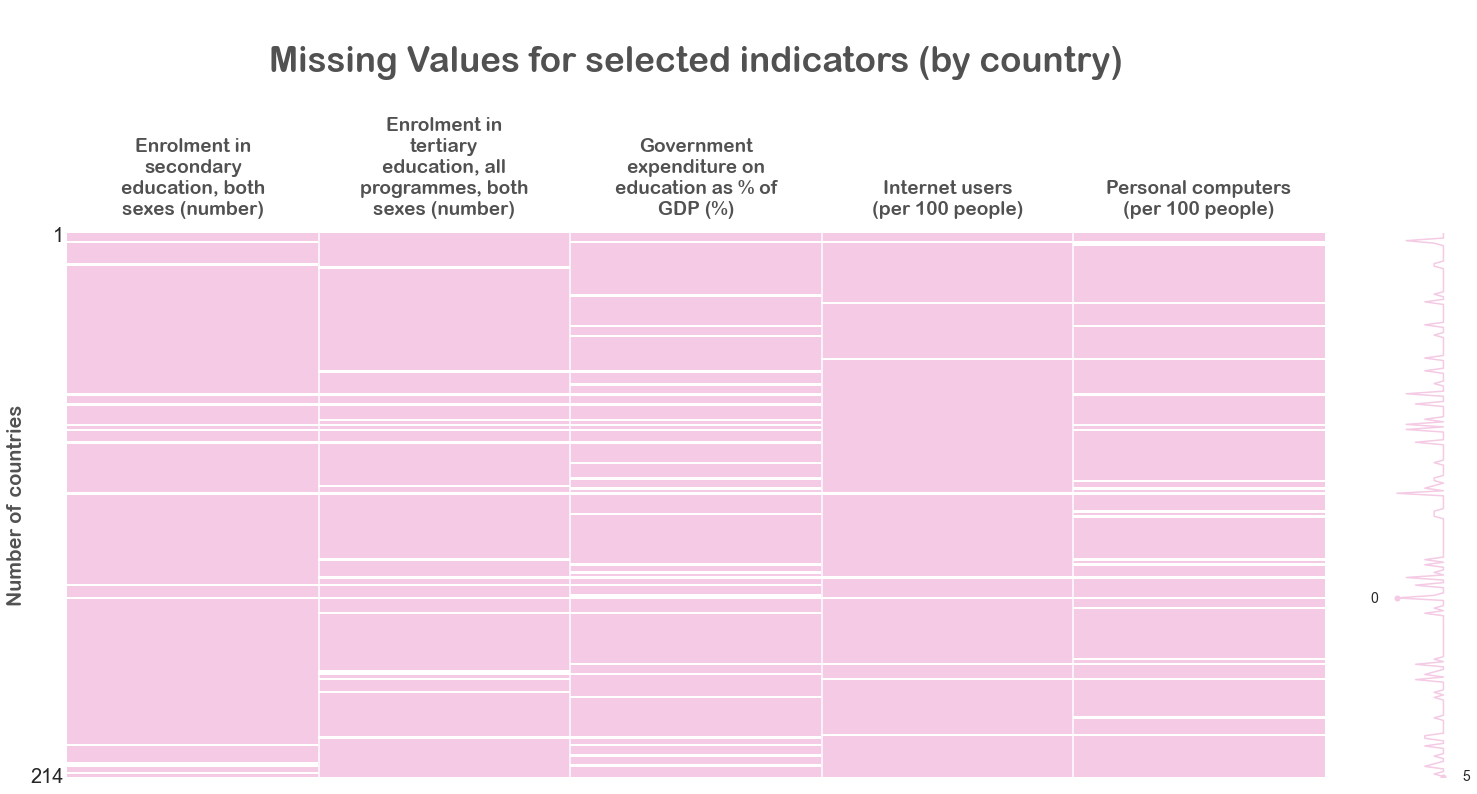

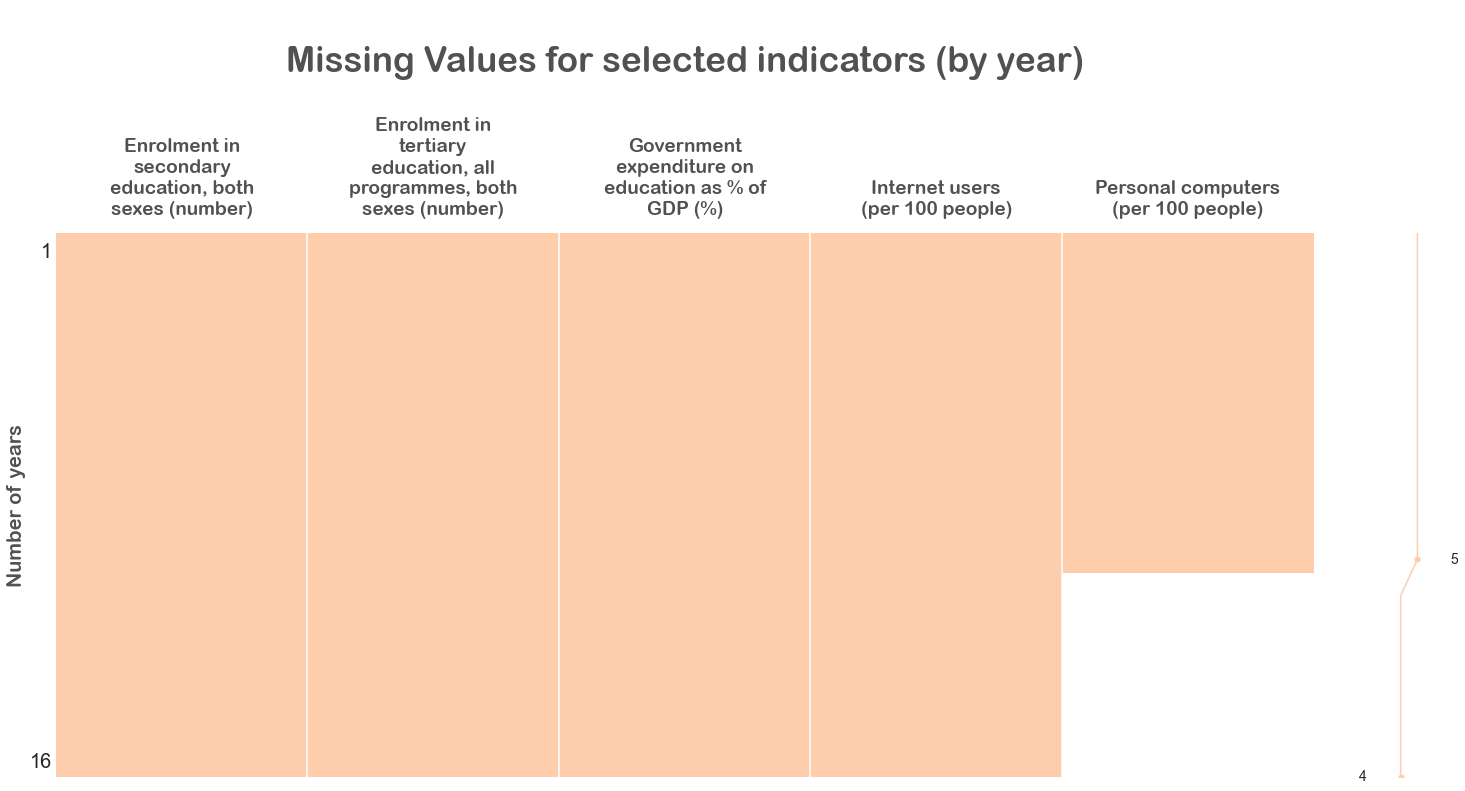

In [324]:
missing_values_indicator_df = toolbox.missing_values_by(data_education_stats_subset, 'Indicator Name')
display(missing_values_indicator_df.head())

subset_direction_indicateur = toolbox.get_subset_direction_indicateur_country(data_education_stats_subset)
toolbox.plot_missing_values_indicators(subset_direction_indicateur, 'Pastel2', 3, 'countries', 'country')

subset_direction_indicateur_year = toolbox.get_subset_direction_indicateur_year(data_education_stats_subset)
toolbox.plot_missing_values_indicators(subset_direction_indicateur_year, 'Pastel2', 1, 'years', 'year')

<h3 style="font-family:Corbel Light; color:#737373">4. Suppression des pays avec trop peu de données</h3>

#### 4.1 Taux de valeurs manquantes par pays pour tous les indicateurs/toutes les années

In [325]:
missing_values_country_df = toolbox.missing_values_by(data_education_stats_subset, 'Country Name')
missing_values_country_df.head()

Number of Missing Values  Missing Values (%)
Country Name                                                           
Kosovo                                           80              100.00
Northern Mariana Islands                         80              100.00
American Samoa                                   79               98.75
Curacao                                          77               96.25
Sint Maarten (Dutch part)                        75               93.75

#### 4.2 Ecarte les pays avec plus de 70% de données manquantes

In [326]:
data_education_stats_subset = toolbox.drop_countries_by_threshold(data_education_stats_subset, 70)

23 pays supprimé(s)
Il reste 191 pays

            Dropped countries
0              American Samoa
1                     Curacao
2               Faroe Islands
3            French Polynesia
4                   Gibraltar
5                   Greenland
6                        Guam
7                       Haiti
8   Korea, Dem. People’s Rep.
9                      Kosovo
10                    Liberia
11                      Nauru
12              New Caledonia
13   Northern Mariana Islands
14                      Palau
15           Papua New Guinea
16  Sint Maarten (Dutch part)
17                    Somalia
18                South Sudan
19               Turkmenistan
20   Turks and Caicos Islands
21                     Tuvalu
22      Virgin Islands (U.S.) 



In [327]:
missing_values_indicator_df = toolbox.missing_values_by(data_education_stats_subset, 'Indicator Name')
display(missing_values_indicator_df.head())

Number of Missing Values  \
Indicator Name                                                                 
Personal computers (per 100 people)                                     1868   
Government expenditure on education as % of GDP...                      1270   
Enrolment in tertiary education, all programmes...                       982   
Enrolment in secondary education, both sexes (n...                       716   
Internet users (per 100 people)                                           72   

                                                    Missing Values (%)  
Indicator Name                                                          
Personal computers (per 100 people)                              61.13  
Government expenditure on education as % of GDP...               41.56  
Enrolment in tertiary education, all programmes...               32.13  
Enrolment in secondary education, both sexes (n...               23.43  
Internet users (per 100 people)                                   2.36

<h2 style="font-family:Corbel; color:#737373">Remplissage des données manquantes </h2>

<h3 style="font-family:Corbel Light; color:#737373">1. Inspection des données </h3>

On vérifie que toutes les colonnes sont bien typées

In [328]:
data_education_stats_subset.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
2000              float64
2001              float64
2002              float64
2003              float64
2004              float64
2005              float64
2006              float64
2007              float64
2008              float64
2009              float64
2010              float64
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
dtype: object

<h3 style="font-family:Corbel Light; color:#737373">2. Interpolation linéaire indicateur par indicateur </h3>

Pour chaque indicateur : 
- on écarte les pays avec un nombre de valeurs manquantes consécutives >= quantile d'ordre 0.9
- on réalise une interpolation linéaire 

Rmq : j'ai retenue l'imputation par interpolation linéaire car cette méthode utilise les variables autour de la donnée manquante, ce qui semblait plus approprié, étant donnée que les valeurs sont toutes régulièrement espacées d’un an. 

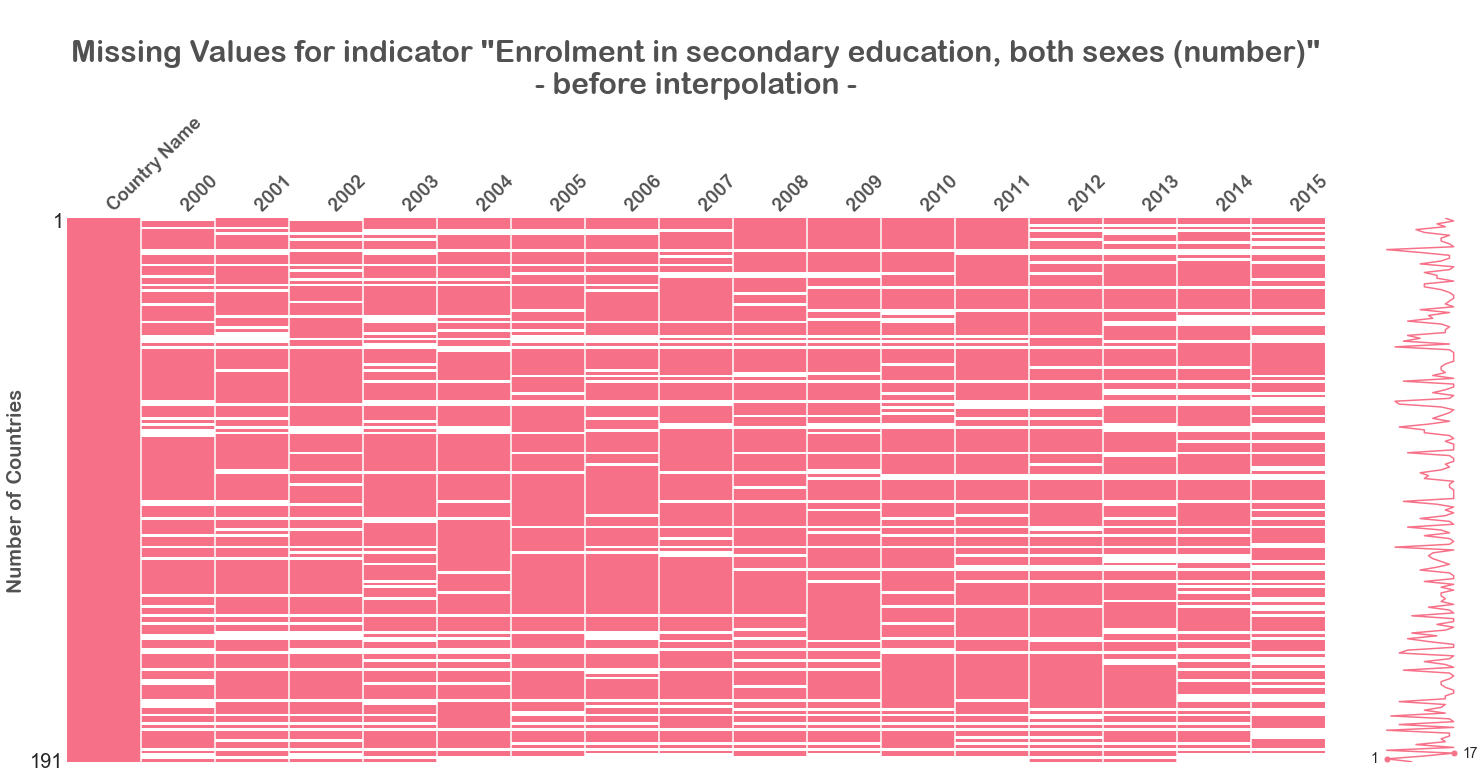

Le quantile d'ordre 0.9 est : 8.0 .
On supprime donc tous les pays avec plus de 8.0 valeurs manquantes consécutives.
22 pays supprimé(s)
Il reste 169 pays

        Dropped countries
0              Azerbaijan
1                 Belarus
2                 Comoros
3           Cote d'Ivoire
4       Equatorial Guinea
5                   Gabon
6             Gambia, The
7           Guinea-Bissau
8                    Iraq
9                   Libya
10               Maldives
11  Micronesia, Fed. Sts.
12                Namibia
13            Puerto Rico
14           Sierra Leone
15              Sri Lanka
16               Tanzania
17    Trinidad and Tobago
18   United Arab Emirates
19                Vietnam
20                 Zambia
21               Zimbabwe 



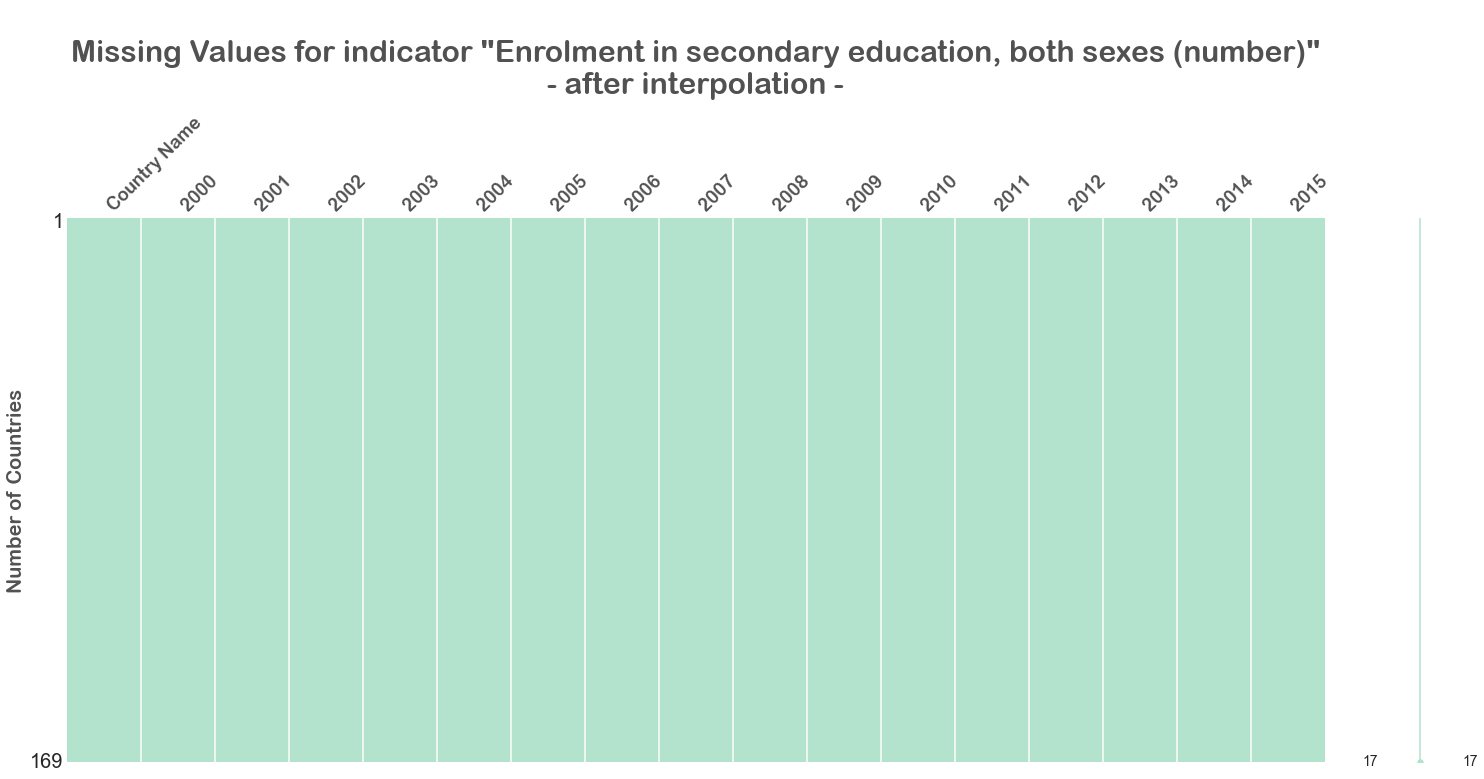

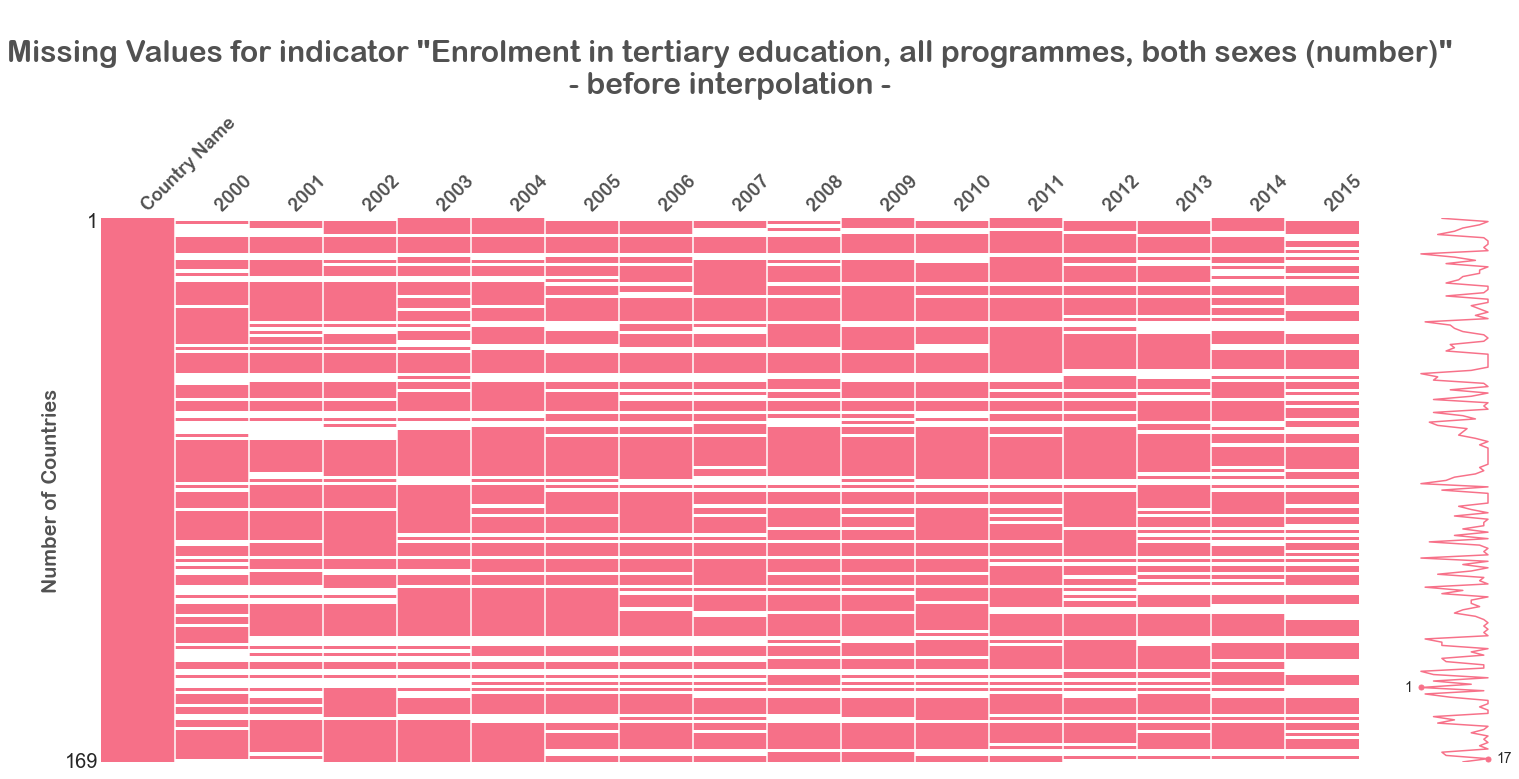

Le quantile d'ordre 0.9 est : 9.0 .
On supprime donc tous les pays avec plus de 9.0 valeurs manquantes consécutives.
20 pays supprimé(s)
Il reste 149 pays

                 Dropped countries
0              Antigua and Barbuda
1                     Bahamas, The
2                           Canada
3                         Dominica
4                             Fiji
5                          Germany
6                          Grenada
7                         Kiribati
8                 Marshall Islands
9                           Monaco
10                       Nicaragua
11                           Samoa
12           Sao Tome and Principe
13                      Seychelles
14                 Solomon Islands
15                    South Africa
16  St. Vincent and the Grenadines
17                        Suriname
18                           Tonga
19                         Vanuatu 



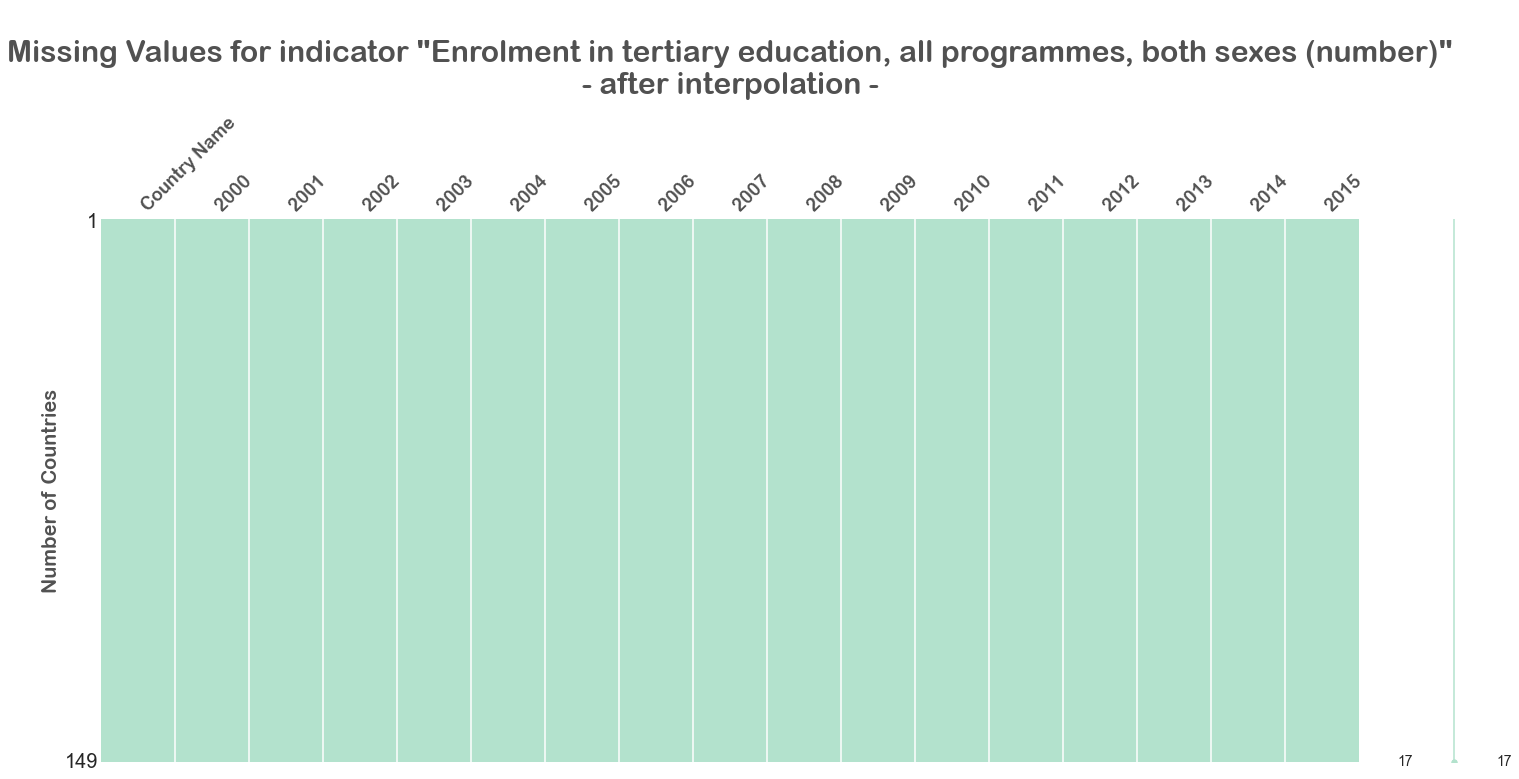

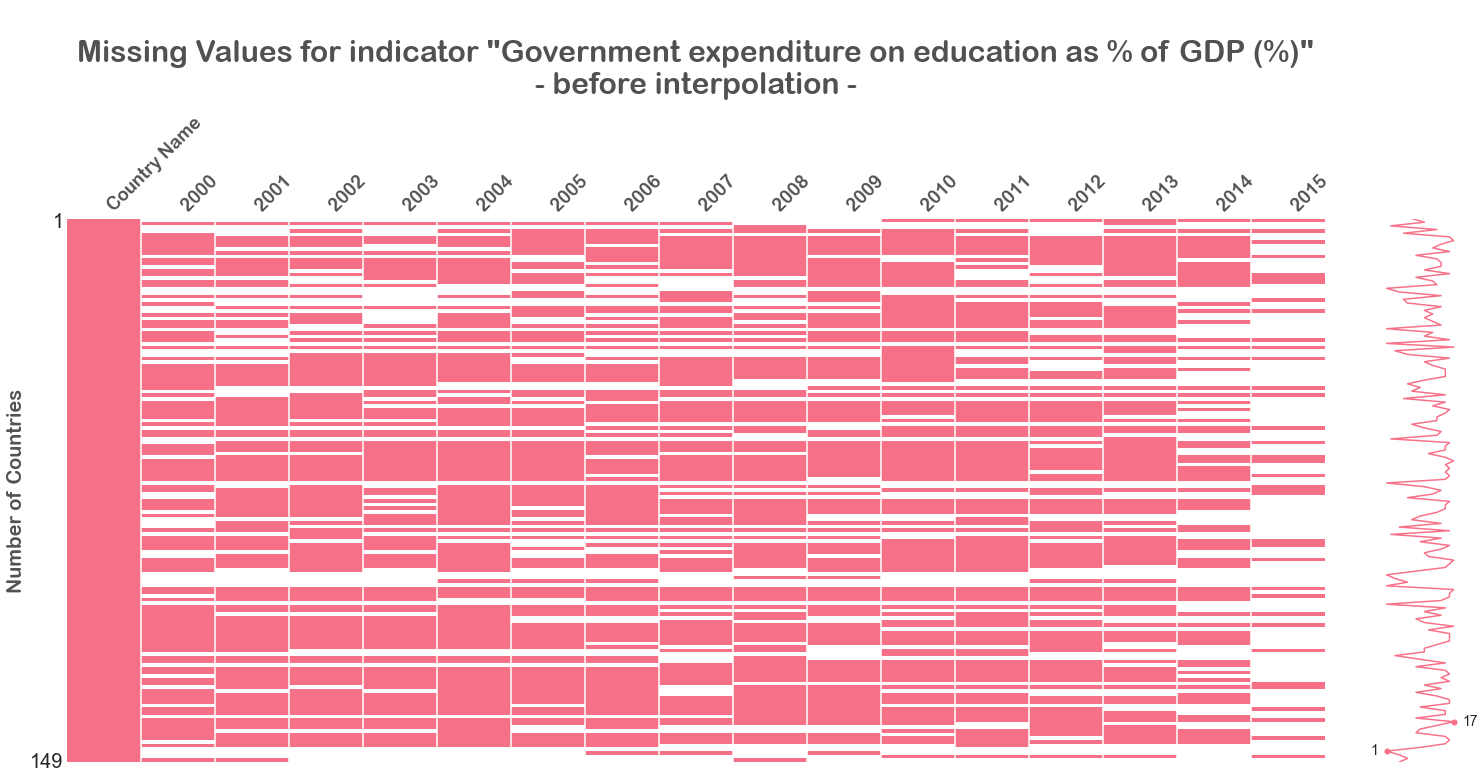

Le quantile d'ordre 0.9 est : 10.0 .
On supprime donc tous les pays avec plus de 10.0 valeurs manquantes consécutives.
16 pays supprimé(s)
Il reste 133 pays

         Dropped countries
0              Afghanistan
1   Bosnia and Herzegovina
2           Cayman Islands
3                    China
4         Congo, Dem. Rep.
5                   Greece
6                 Honduras
7                   Jordan
8               Luxembourg
9           Macedonia, FYR
10              Montenegro
11                 Myanmar
12                 Nigeria
13              San Marino
14              Uzbekistan
15      West Bank and Gaza 



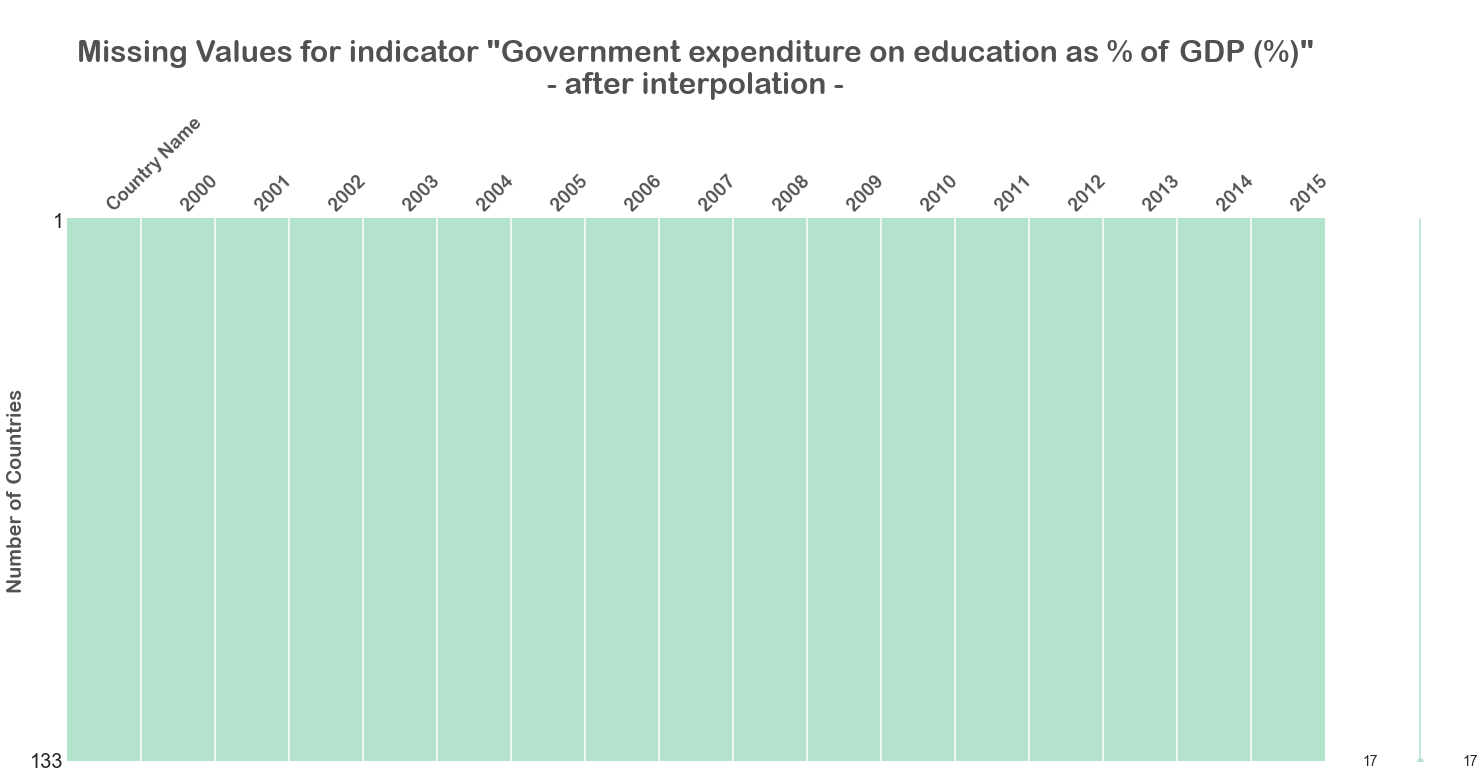

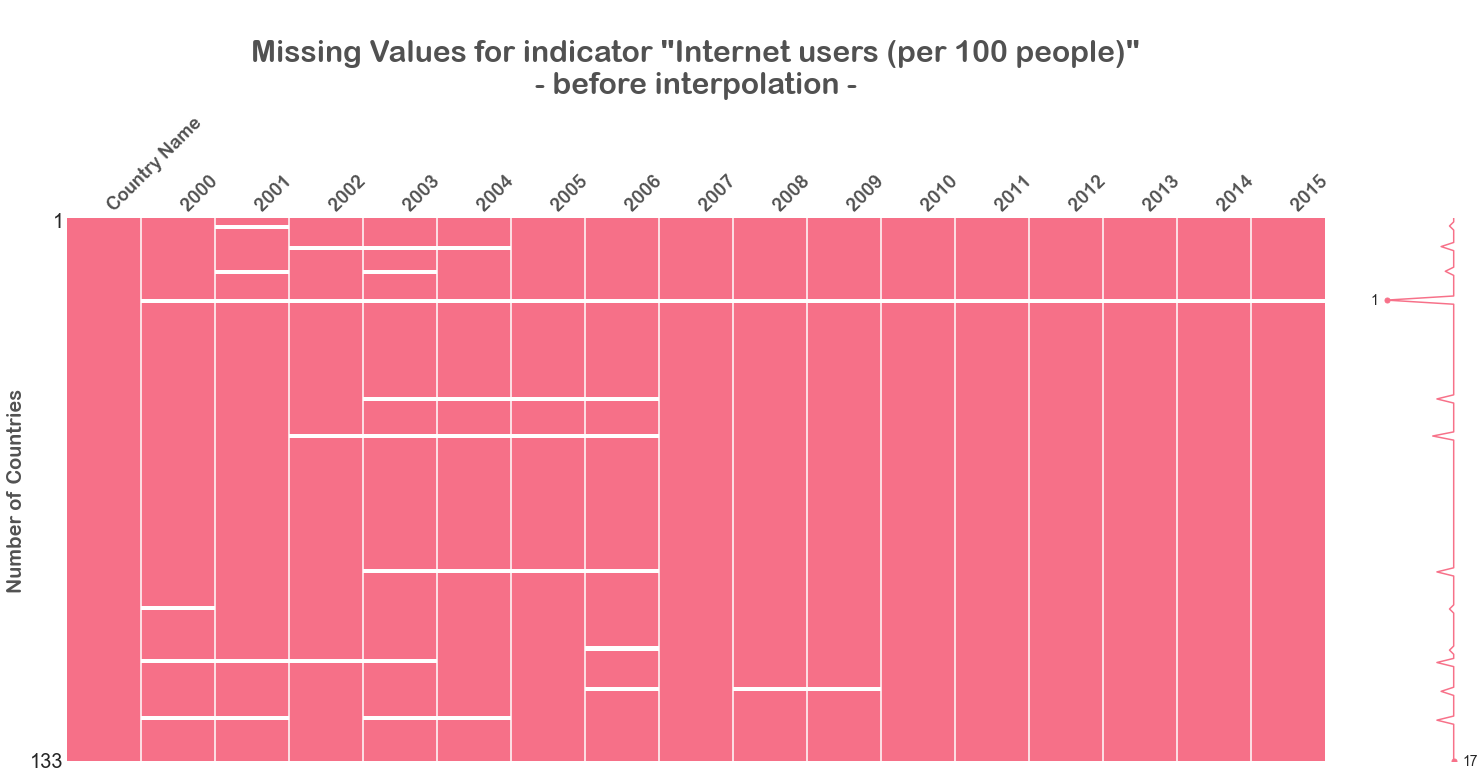

Le quantile d'ordre 0.9 est : 0.0 .
On ne supprime que les pays vides
1 pays supprimé(s)
Il reste 132 pays

        Dropped countries
0  British Virgin Islands 



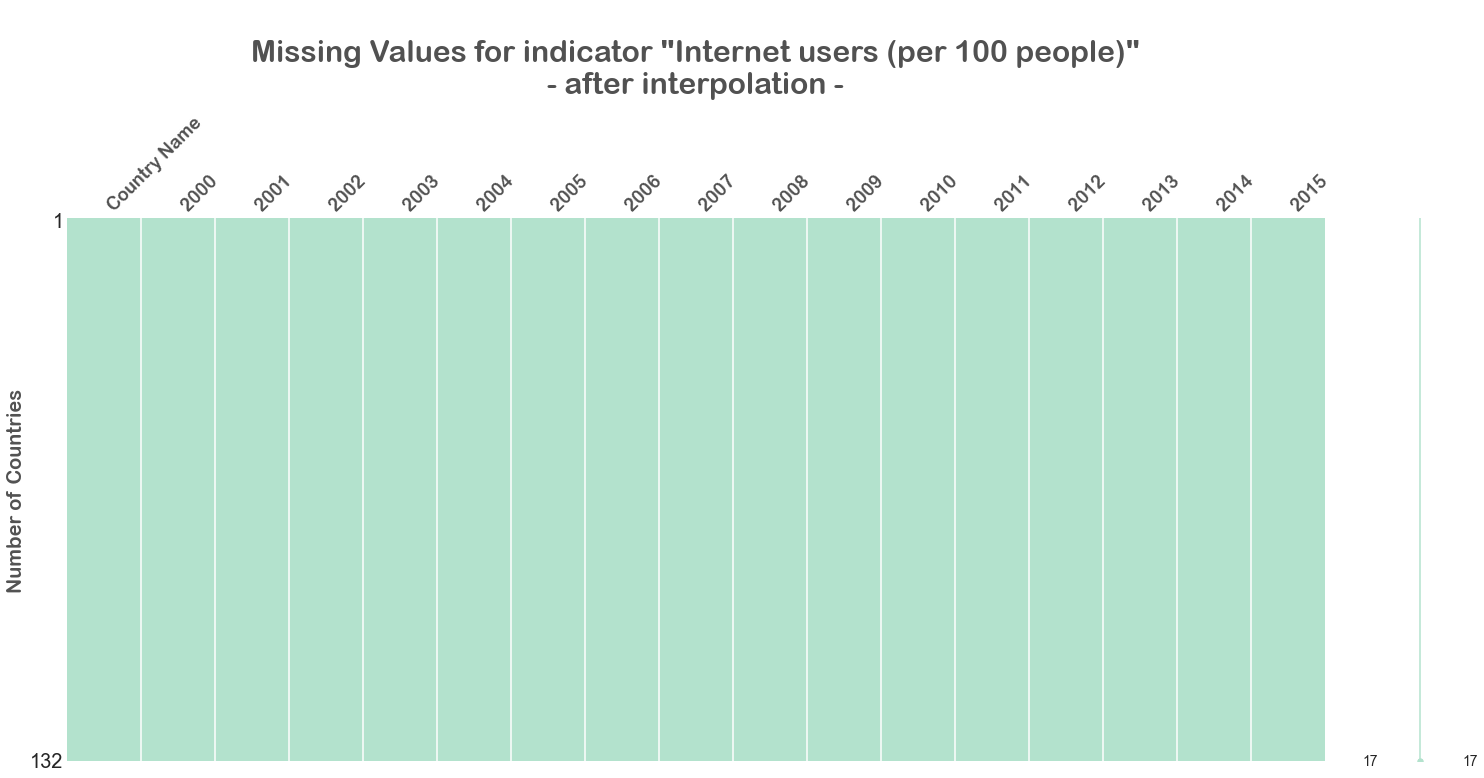

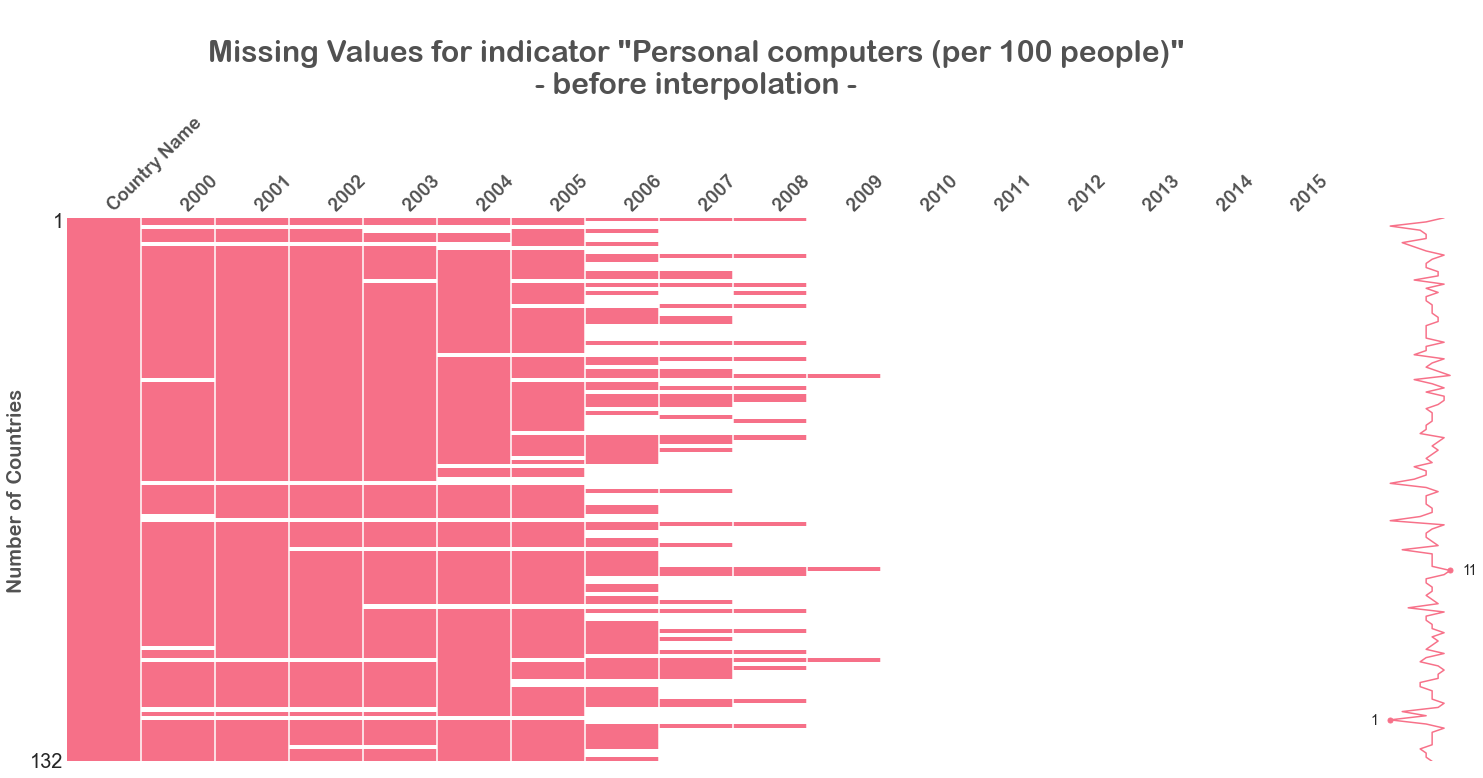

Le quantile d'ordre 0.9 est : 11.0 .
On supprime donc tous les pays avec plus de 11.0 valeurs manquantes consécutives.
15 pays supprimé(s)
Il reste 117 pays

      Dropped countries
0               Andorra
1             Australia
2               Bermuda
3               Croatia
4    Dominican Republic
5                Guyana
6                Israel
7                 Japan
8            Kazakhstan
9         Liechtenstein
10                Malta
11             Pakistan
12  St. Kitts and Nevis
13            St. Lucia
14          Timor-Leste 



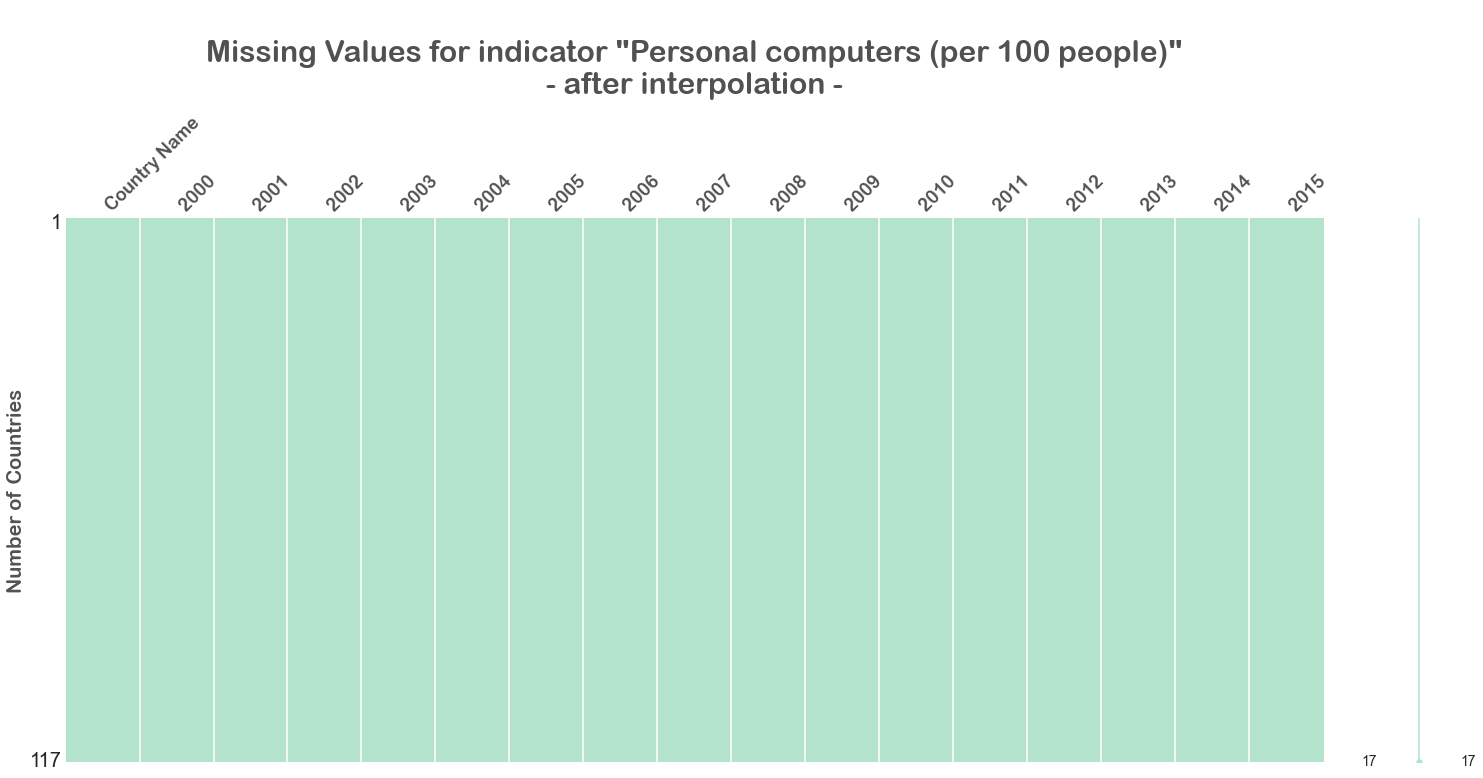

In [332]:
for indicator in data_education_stats_subset['Indicator Name'].unique():

    mask_indicator = data_education_stats_subset['Indicator Name'] == indicator
    subset_indicator = data_education_stats_subset.loc[mask_indicator]
    toolbox.plot_missing_values(subset_indicator, ' before', 'husl', 0)

    data_education_stats_subset = toolbox.drop_countries_with_consecutive_null(
        data_education_stats_subset, subset_indicator)
    data_education_stats_subset.loc[mask_indicator] = data_education_stats_subset.apply(
        lambda row: toolbox.interpolate(row), axis=1)

    subset_indicator = data_education_stats_subset.loc[mask_indicator]
    toolbox.plot_missing_values(subset_indicator, ' after', 'Pastel2', 0)

<h3 style="font-family:Corbel Light; color:#737373">3. Jeu de données nettoyé </h3>

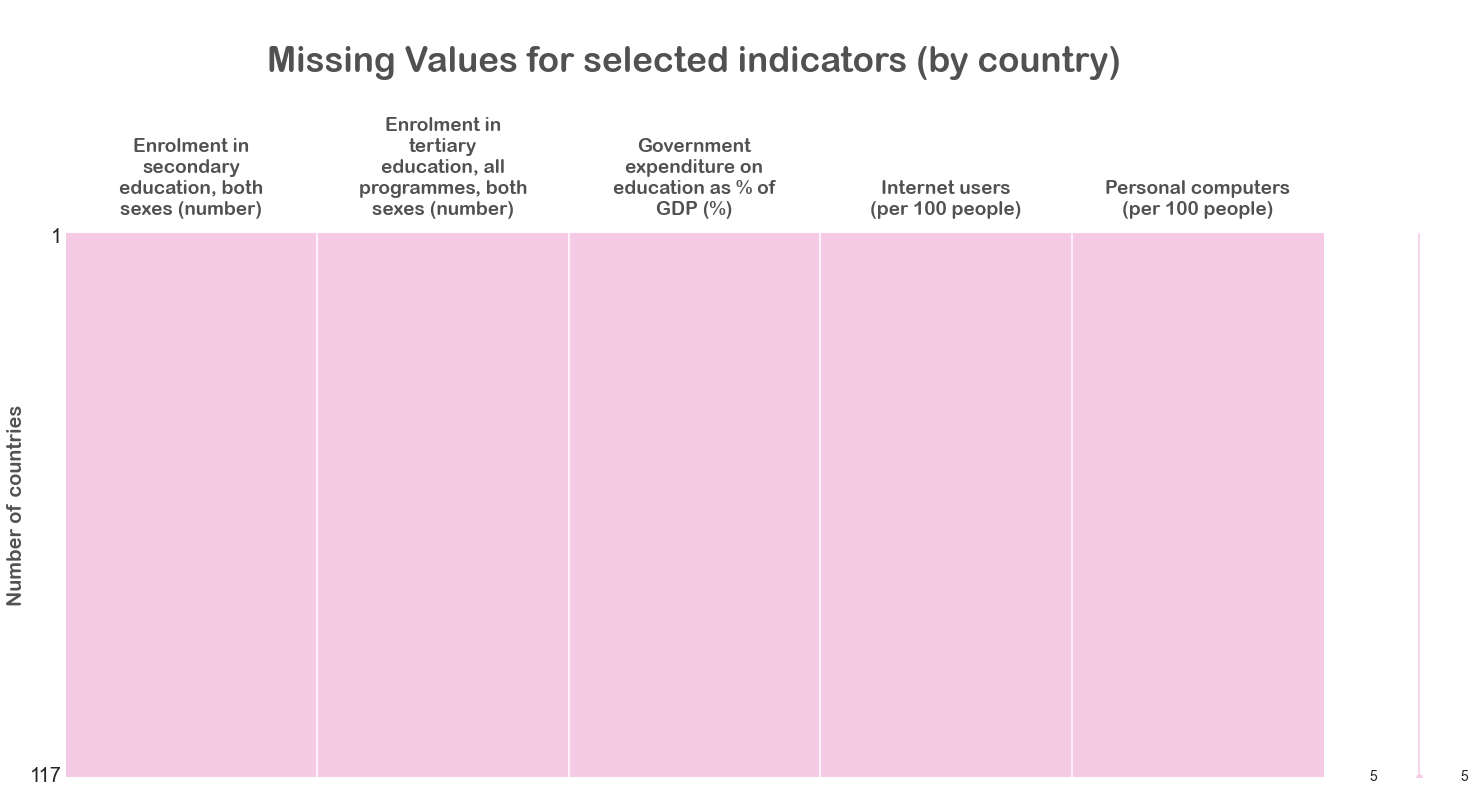

In [333]:
subset_direction_indicateur = toolbox.get_subset_direction_indicateur_country(data_education_stats_subset)
toolbox.plot_missing_values_indicators(subset_direction_indicateur, 
                                       'Pastel2', 3, 'countries', 'country')

Limites de la démarche de nettoyage : 

Il manquait beaucoup de données dans ce jeu même en sélectionnant les indicateurs avec le plus de données : 
- on a dû réduire drastiquement le nombre de pays (de 217 à 117). Parmis les pays écartés par manque de données, certains auraient pu nous intéresser, je pense notamment à l’Allemagne ou au Canada. 
- pour les pays restant, on a dû utiliser l’interpolation linéaire pour compléter les données manquantes. Les analyses de la partie suivante sont donc basées sur des données en partie erronées. 

***

***

<h1 style="font-family:Corbel Light; color:#737373"><span style="color:#e54b87">Étape 2</span> : Analyse des données</h1>

***

***

<h2 style="font-family:Corbel; color:#737373">1. Ajout des infos pays </h2>

In [334]:
data_countries = pd.read_csv('EdStatsCountry.csv')
# supprime colonne 'Unnamed 31'
data_countries.dropna(how='all', axis=1, inplace=True)
columns_to_keep = ['Country Code', 'Currency Unit', 'Region', 'Income Group']

data_education_stats_subset = pd.merge(
    data_education_stats_subset, data_countries[columns_to_keep], on='Country Code', how='left')

In [335]:
list_region = data_education_stats_subset['Region'].unique()
print(len(list_region), 'regions')
print(list_region)

list_income_group = data_education_stats_subset['Income Group'].unique()
print(len(list_income_group), 'income group')
print(list_income_group)

7 regions
['Europe & Central Asia' 'Middle East & North Africa' 'Sub-Saharan Africa'
 'Latin America & Caribbean' 'South Asia' 'East Asia & Pacific'
 'North America']
5 income group
['Upper middle income' 'Lower middle income' 'High income: nonOECD'
 'High income: OECD' 'Low income']


On vérifie que le jeu de données est complet sur les colonnes ajoutées

In [336]:
data_education_stats_subset.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2000              0
2001              0
2002              0
2003              0
2004              0
2005              0
2006              0
2007              0
2008              0
2009              0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
Currency Unit     0
Region            0
Income Group      0
dtype: int64

<h2 style="font-family:Corbel; color:#737373">2. Représentations graphiques </h2>

### 2.1 BoxPlot pays regroupés par région (2015)

Méthodologie :

- j'ai uniquement représenté les régions avec plus de 10 pays renseignés, car avec un effectif trop petit les quartiles et valeurs aberrantes apparaissent dans la boîte et risquent de ne pas être significatif. 
- j'ai laissé les valeurs individuelles apparentes, car les échantillons restants sont assez petits.


Not enough countries in the following categories :  ['South Asia' 'North America'] not relevant to plot a boxplot



Indicator Name                      Enrolment in secondary education, both sexes (number)  \
Region (n)           Country Name                                                           
North America\n(n=1) United States                                      24_229_776.00       
South Asia\n(n=4)    Bangladesh                                         14_566_771.00       
                     Bhutan                                                 74_227.00       
                     India                                             129_542_056.00       
                     Nepal                                               3_176_320.00       

Indicator Name                      Enrolment in tertiary education, all programmes, both sexes (number)  \
Region (n)           Country Name                                                                          
North America\n(n=1) United States                                      19_531_728.00                      
South Asia\n(n=4)    Bangladesh                                          2_068_355.00                      
                     Bhutan                                                  8_543.00                      
                     India                                              32_107_420.00                      
                     Nepal                                                 445_324.00                      

Indicator Name                      Government expenditure on education as % of GDP (%)  \
Region (n)           Country Name                                                         
North America\n(n=1) United States                                               5.38     
South Asia\n(n=4)    Bangladesh                                                  1.96     
                     Bhutan                                                      7.36     
                     India                                                       3.84     
                     Nepal                                                       3.71     

Indicator Name                      Internet users (per 100 people)  \
Region (n)           Country Name                                     
North America\n(n=1) United States                            74.55   
South Asia\n(n=4)    Bangladesh                               14.40   
                     Bhutan                                   39.80   
                     India                                    26.00   
                     Nepal                                    17.58   

Indicator Name                      Personal computers (per 100 people)  
Region (n)           Country Name                                        
North America\n(n=1) United States                                79.92  
South Asia\n(n=4)    Bangladesh                                    2.42  
                     Bhutan                                        1.95  
                     India                                         3.19  
                     Nepal                                         0.52

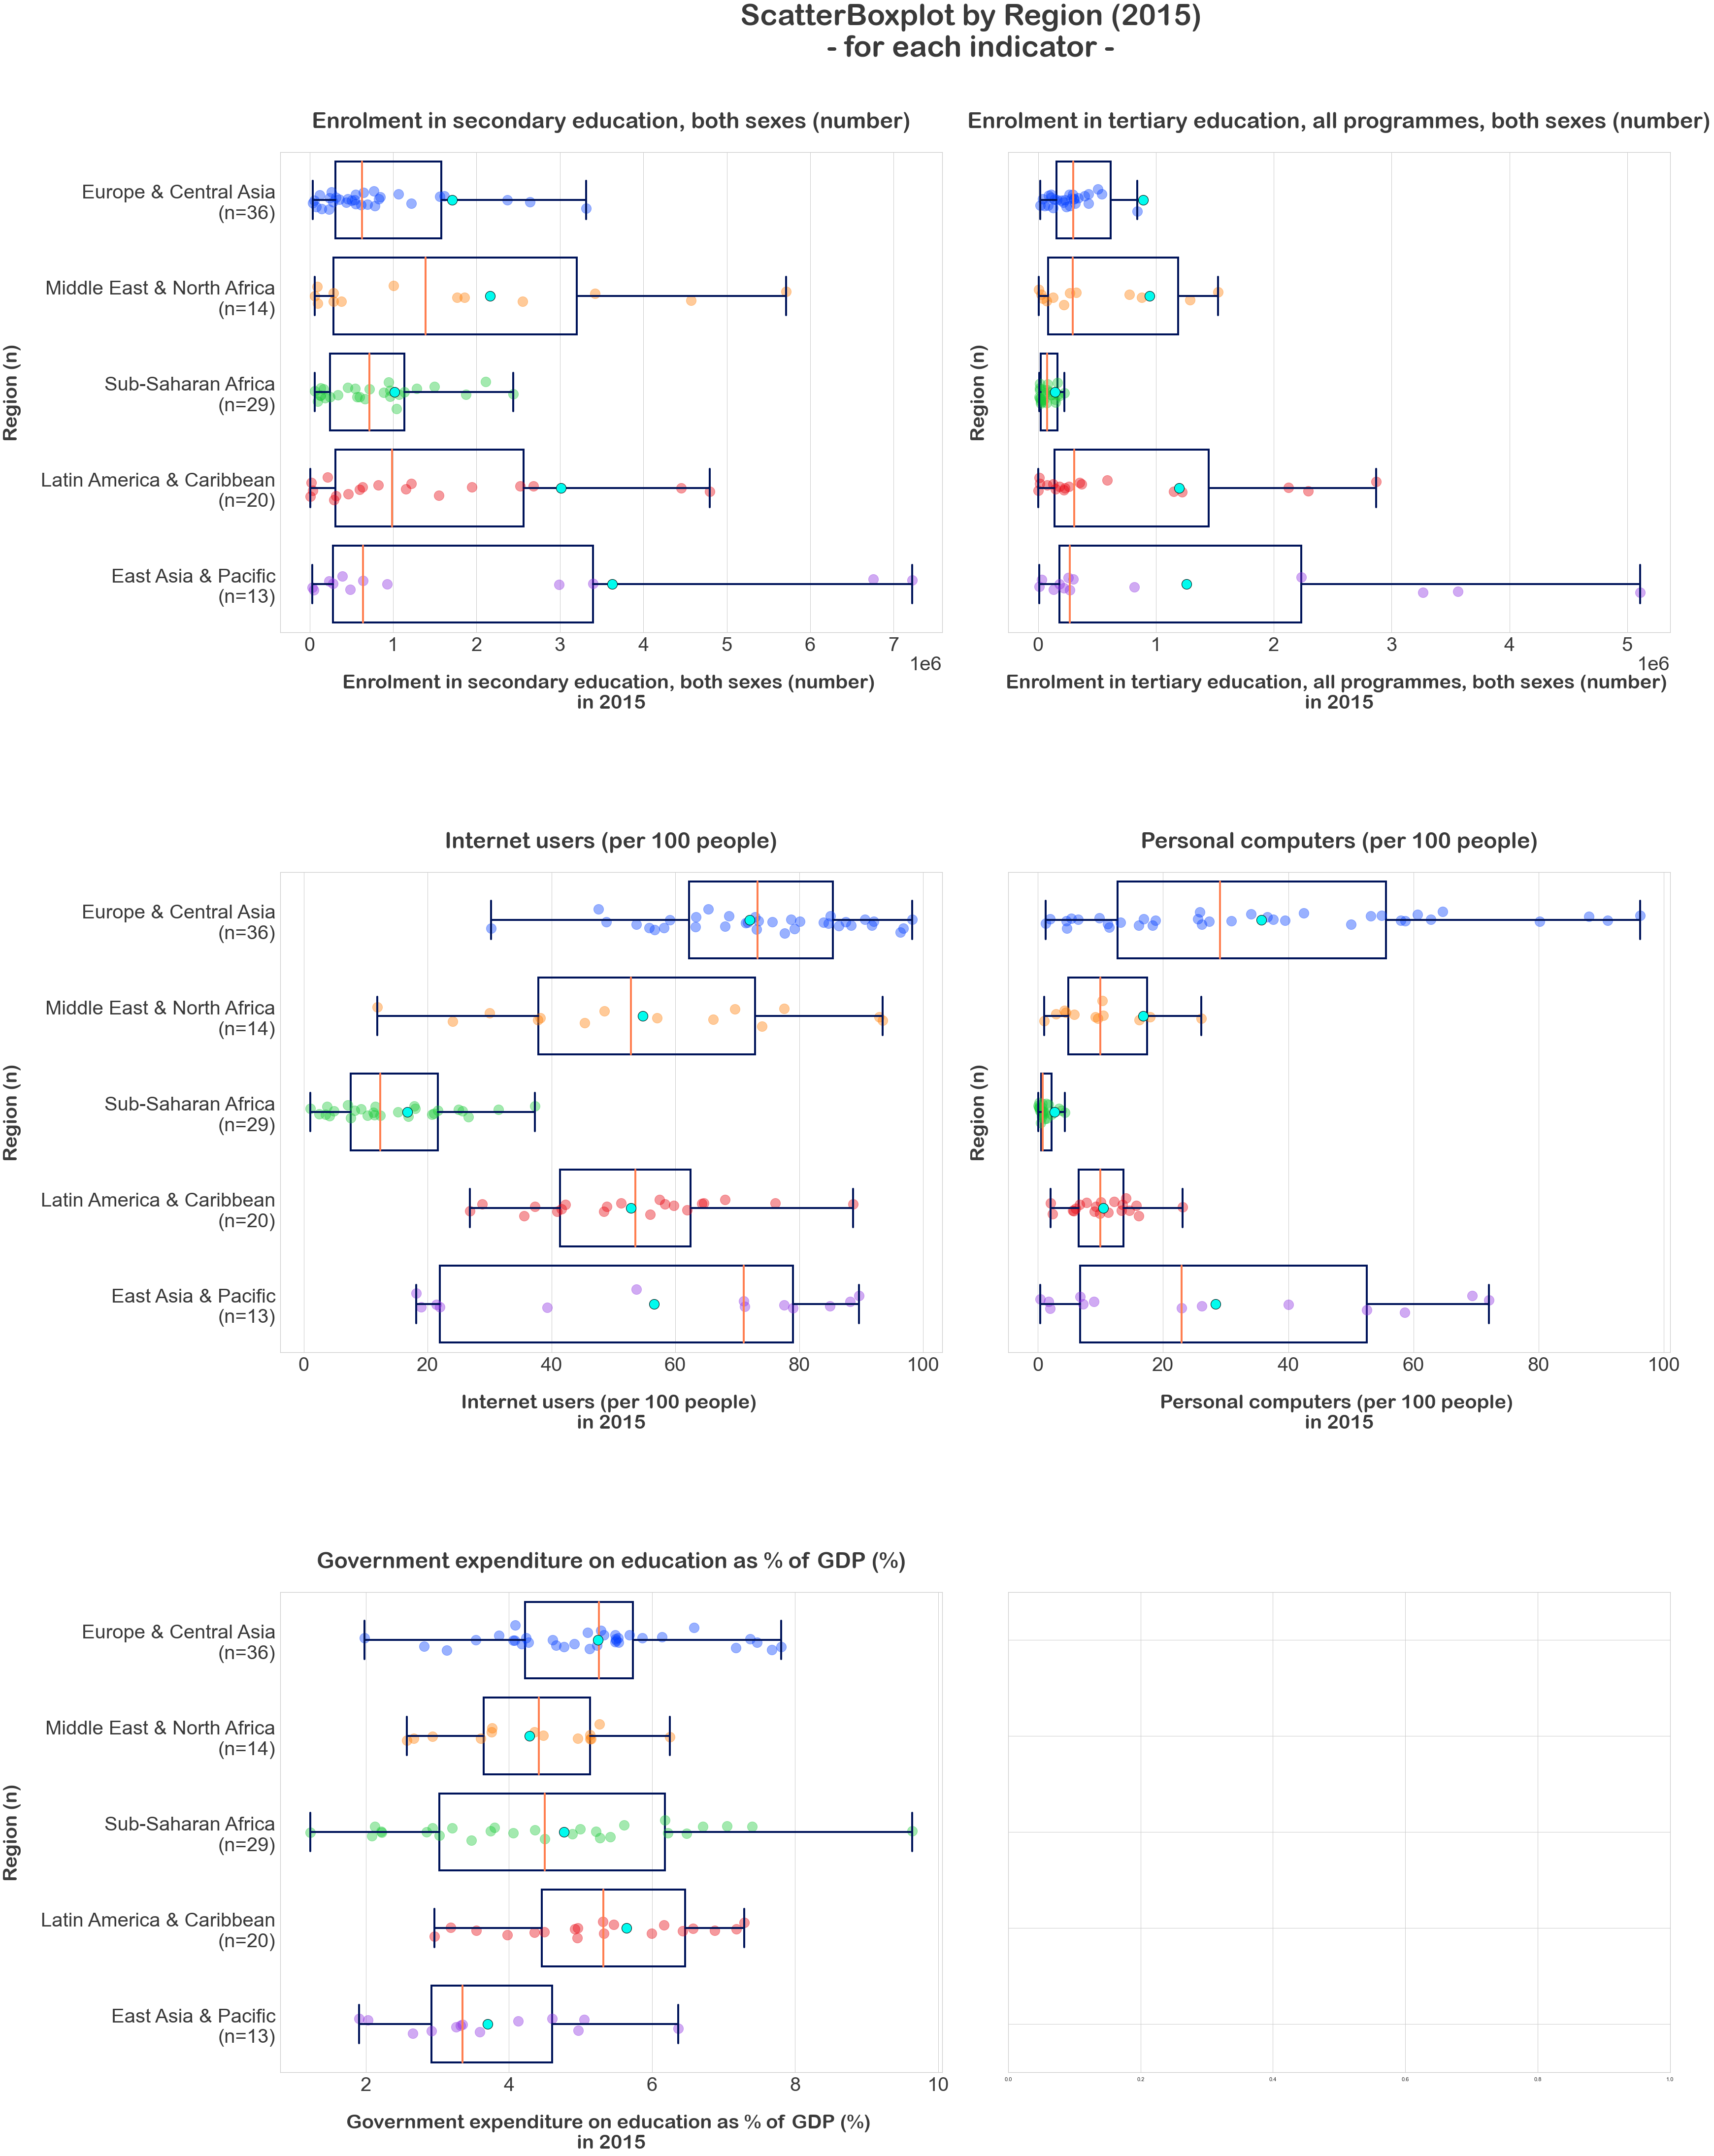

In [339]:
toolbox.plot_boxplot_by(data_education_stats_subset, 'Region', ['2015'], 10, True)

### 2.2 BoxPlot pays regroupés en fonction de leur revenu (2015)

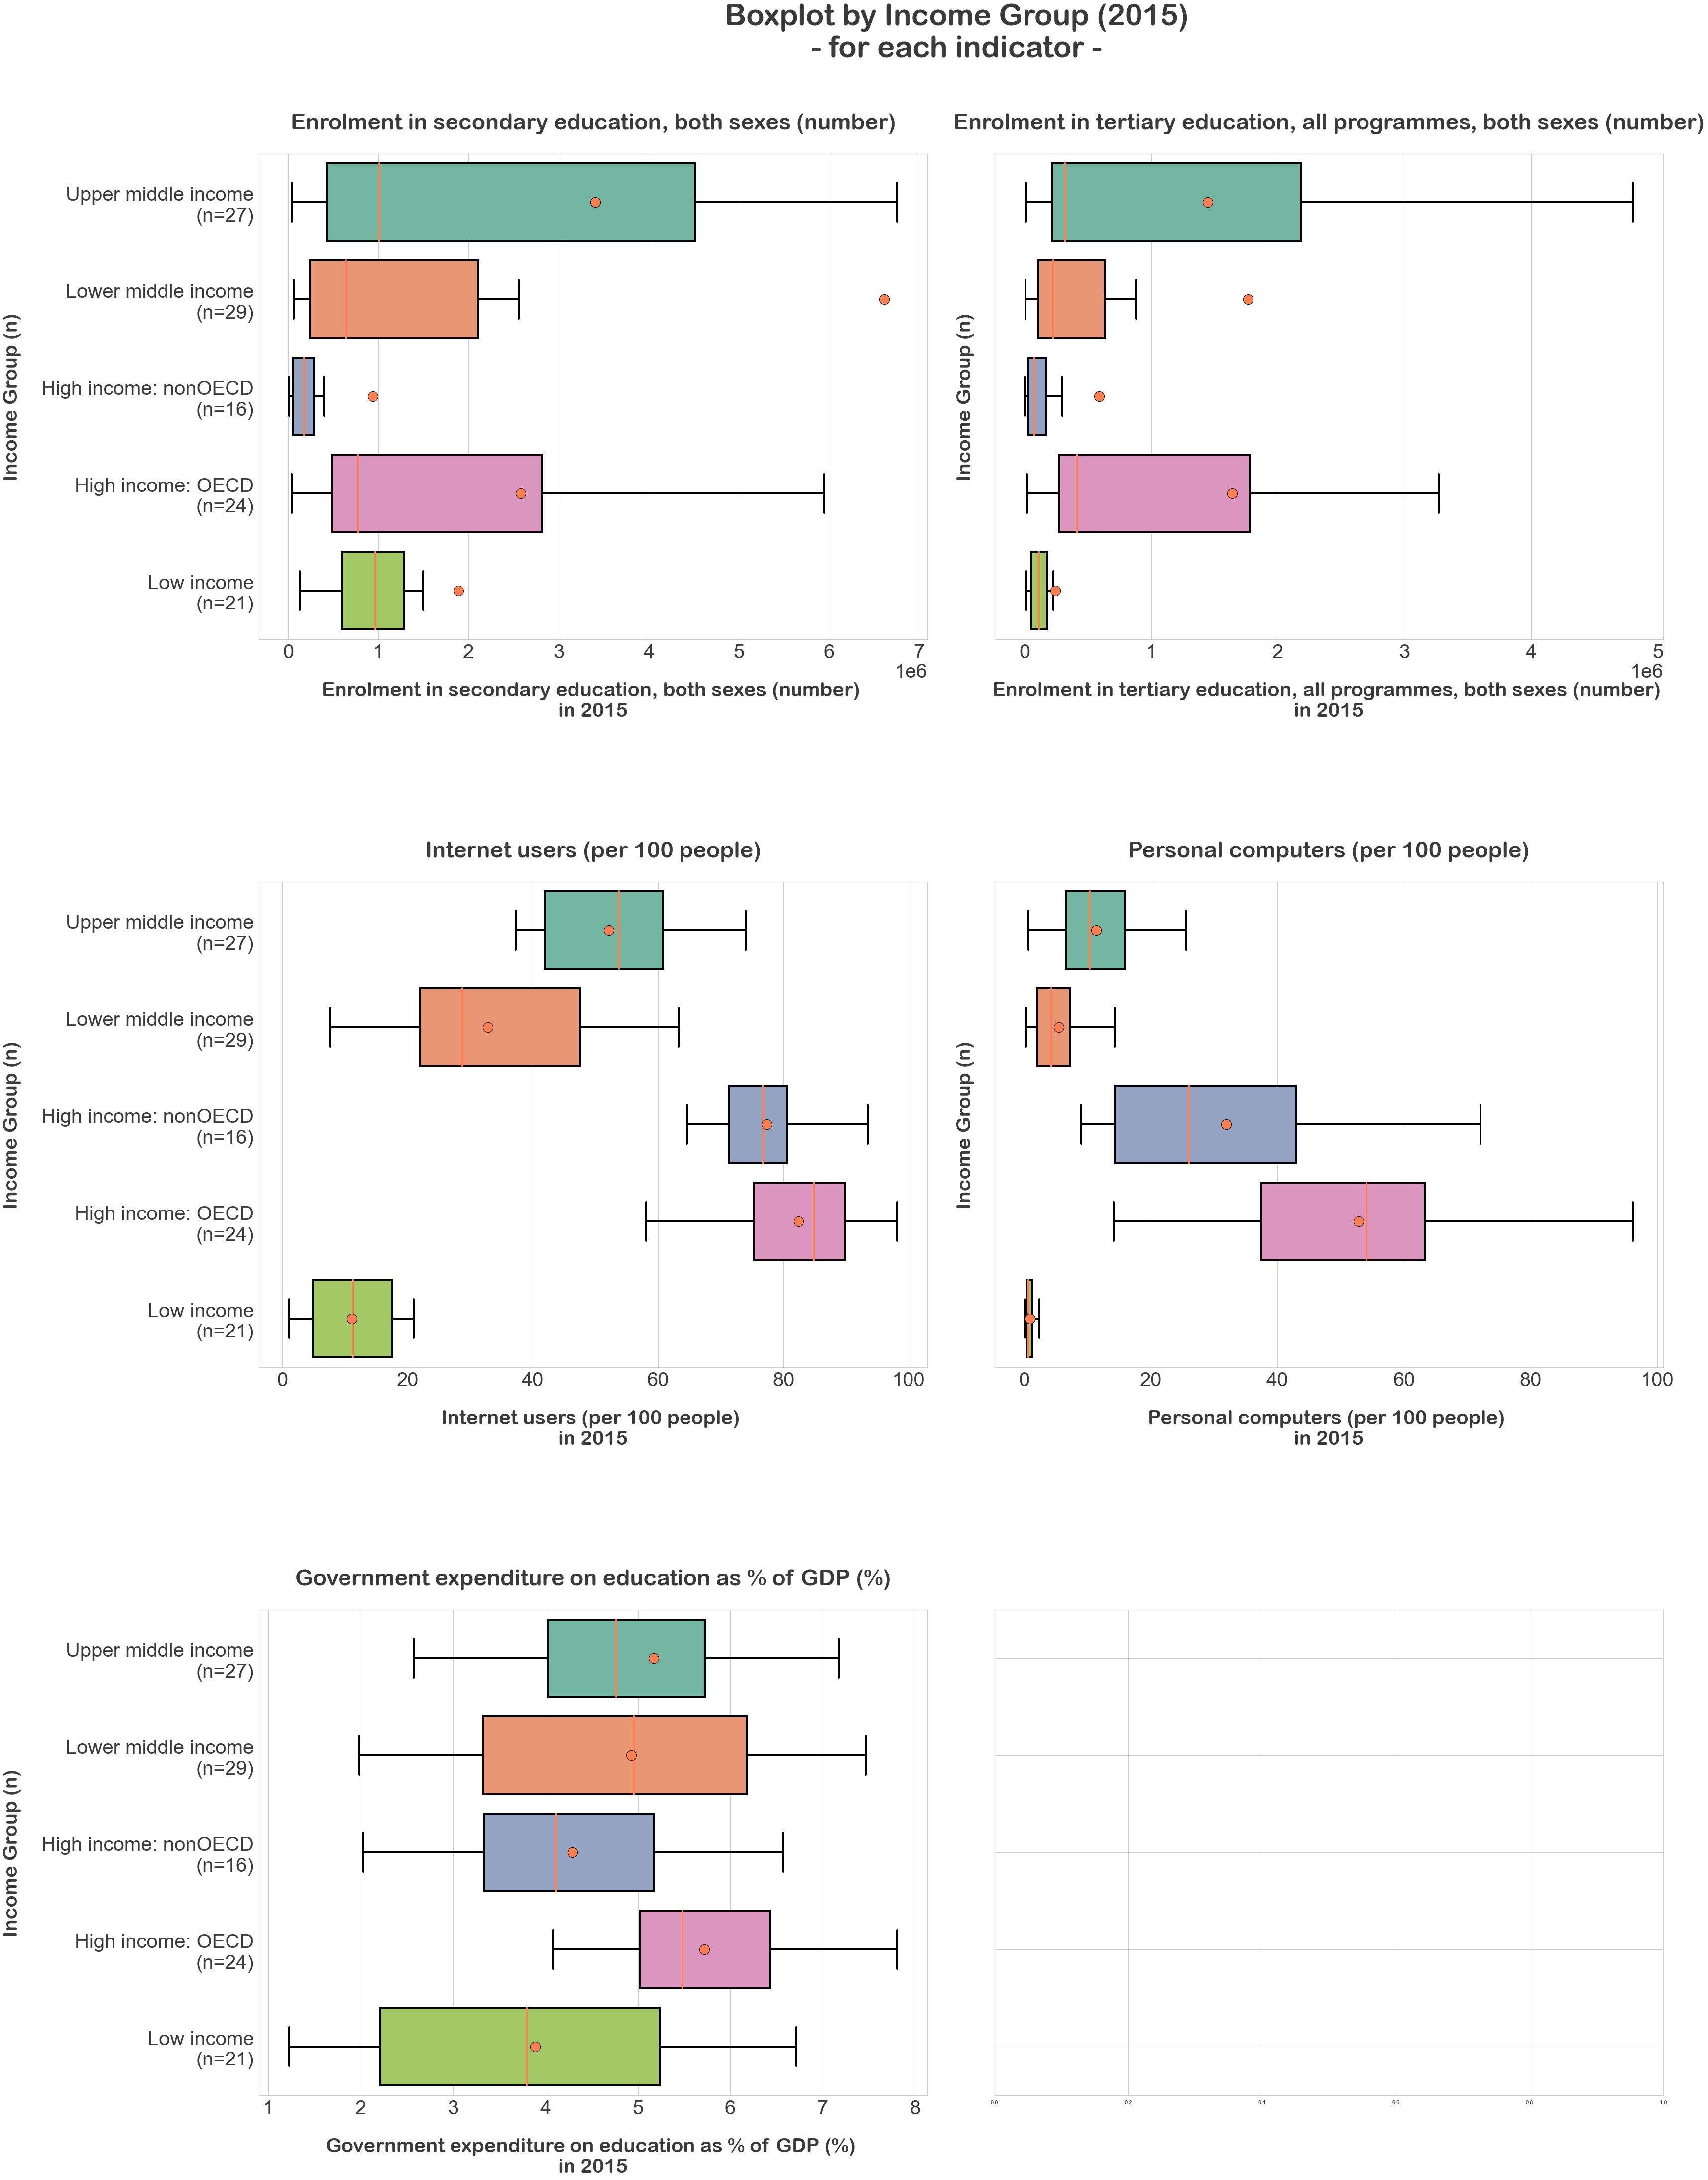

In [340]:
toolbox.plot_boxplot_by(data_education_stats_subset, 'Income Group', ['2015'], 10, False)

### 2.3 BoxPlot pays regroupés par région (moyenne de 2000 à 2015)


Not enough countries in the following categories :  ['South Asia' 'North America'] not relevant to plot a boxplot



Indicator Name                      Enrolment in secondary education, both sexes (number)  \
Region (n)           Country Name                                                           
North America\n(n=1) United States                                      24_058_401.62       
South Asia\n(n=4)    Bangladesh                                         11_380_281.06       
                     Bhutan                                                 50_765.91       
                     India                                              99_008_577.50       
                     Nepal                                               2_315_955.94       

Indicator Name                      Enrolment in tertiary education, all programmes, both sexes (number)  \
Region (n)           Country Name                                                                          
North America\n(n=1) United States                                      17_984_404.75                      
South Asia\n(n=4)    Bangladesh                                          1_386_044.41                      
                     Bhutan                                                  5_293.50                      
                     India                                              18_419_757.62                      
                     Nepal                                                 273_886.22                      

Indicator Name                      Government expenditure on education as % of GDP (%)  \
Region (n)           Country Name                                                         
North America\n(n=1) United States                                               5.31     
South Asia\n(n=4)    Bangladesh                                                  2.06     
                     Bhutan                                                      5.68     
                     India                                                       3.59     
                     Nepal                                                       3.59     

Indicator Name                      Internet users (per 100 people)  \
Region (n)           Country Name                                     
North America\n(n=1) United States                            66.84   
South Asia\n(n=4)    Bangladesh                                3.59   
                     Bhutan                                   10.79   
                     India                                     7.33   
                     Nepal                                     5.19   

Indicator Name                      Personal computers (per 100 people)  
Region (n)           Country Name                                        
North America\n(n=1) United States                                75.52  
South Asia\n(n=4)    Bangladesh                                    1.77  
                     Bhutan                                        1.75  
                     India                                         2.29  
                     Nepal                                         0.48

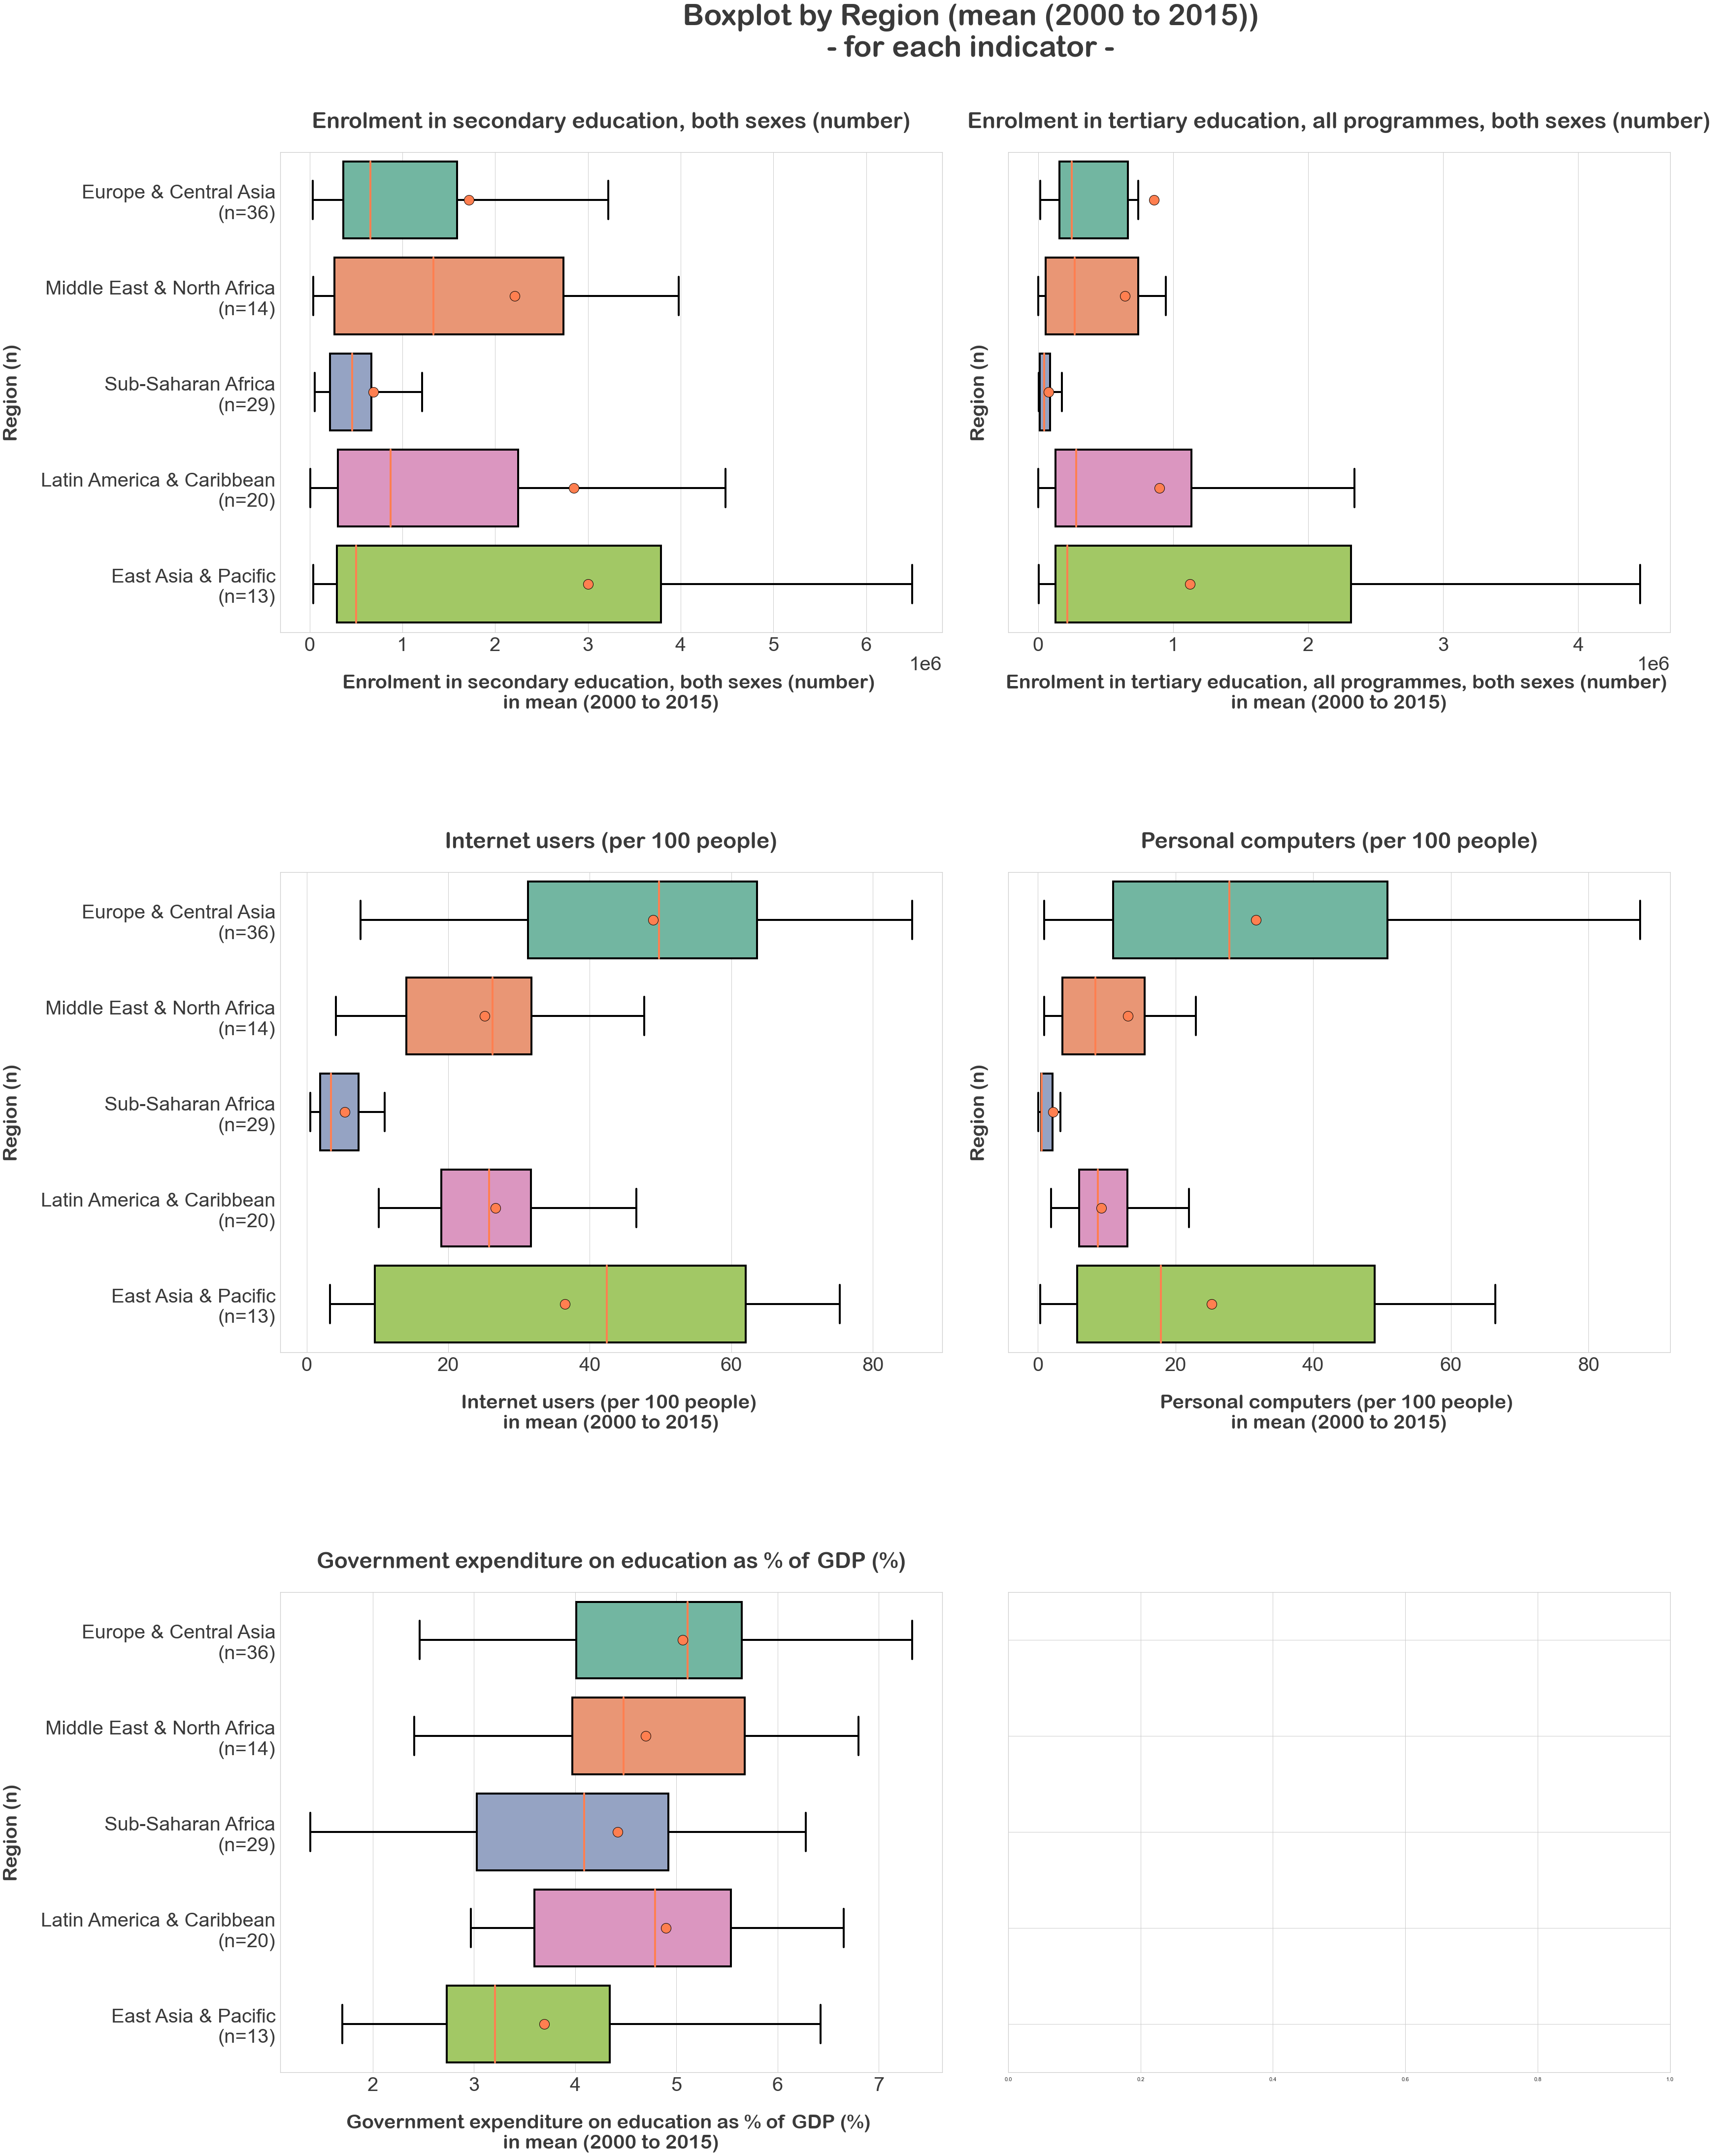

In [341]:
toolbox.plot_boxplot_by(data_education_stats_subset, 'Region', get_columns_year(data_education_stats_subset), 10, False)

### 2.4 BoxPlot pays regroupés en fonction de leur revenu (moyenne 2000 à 2015)

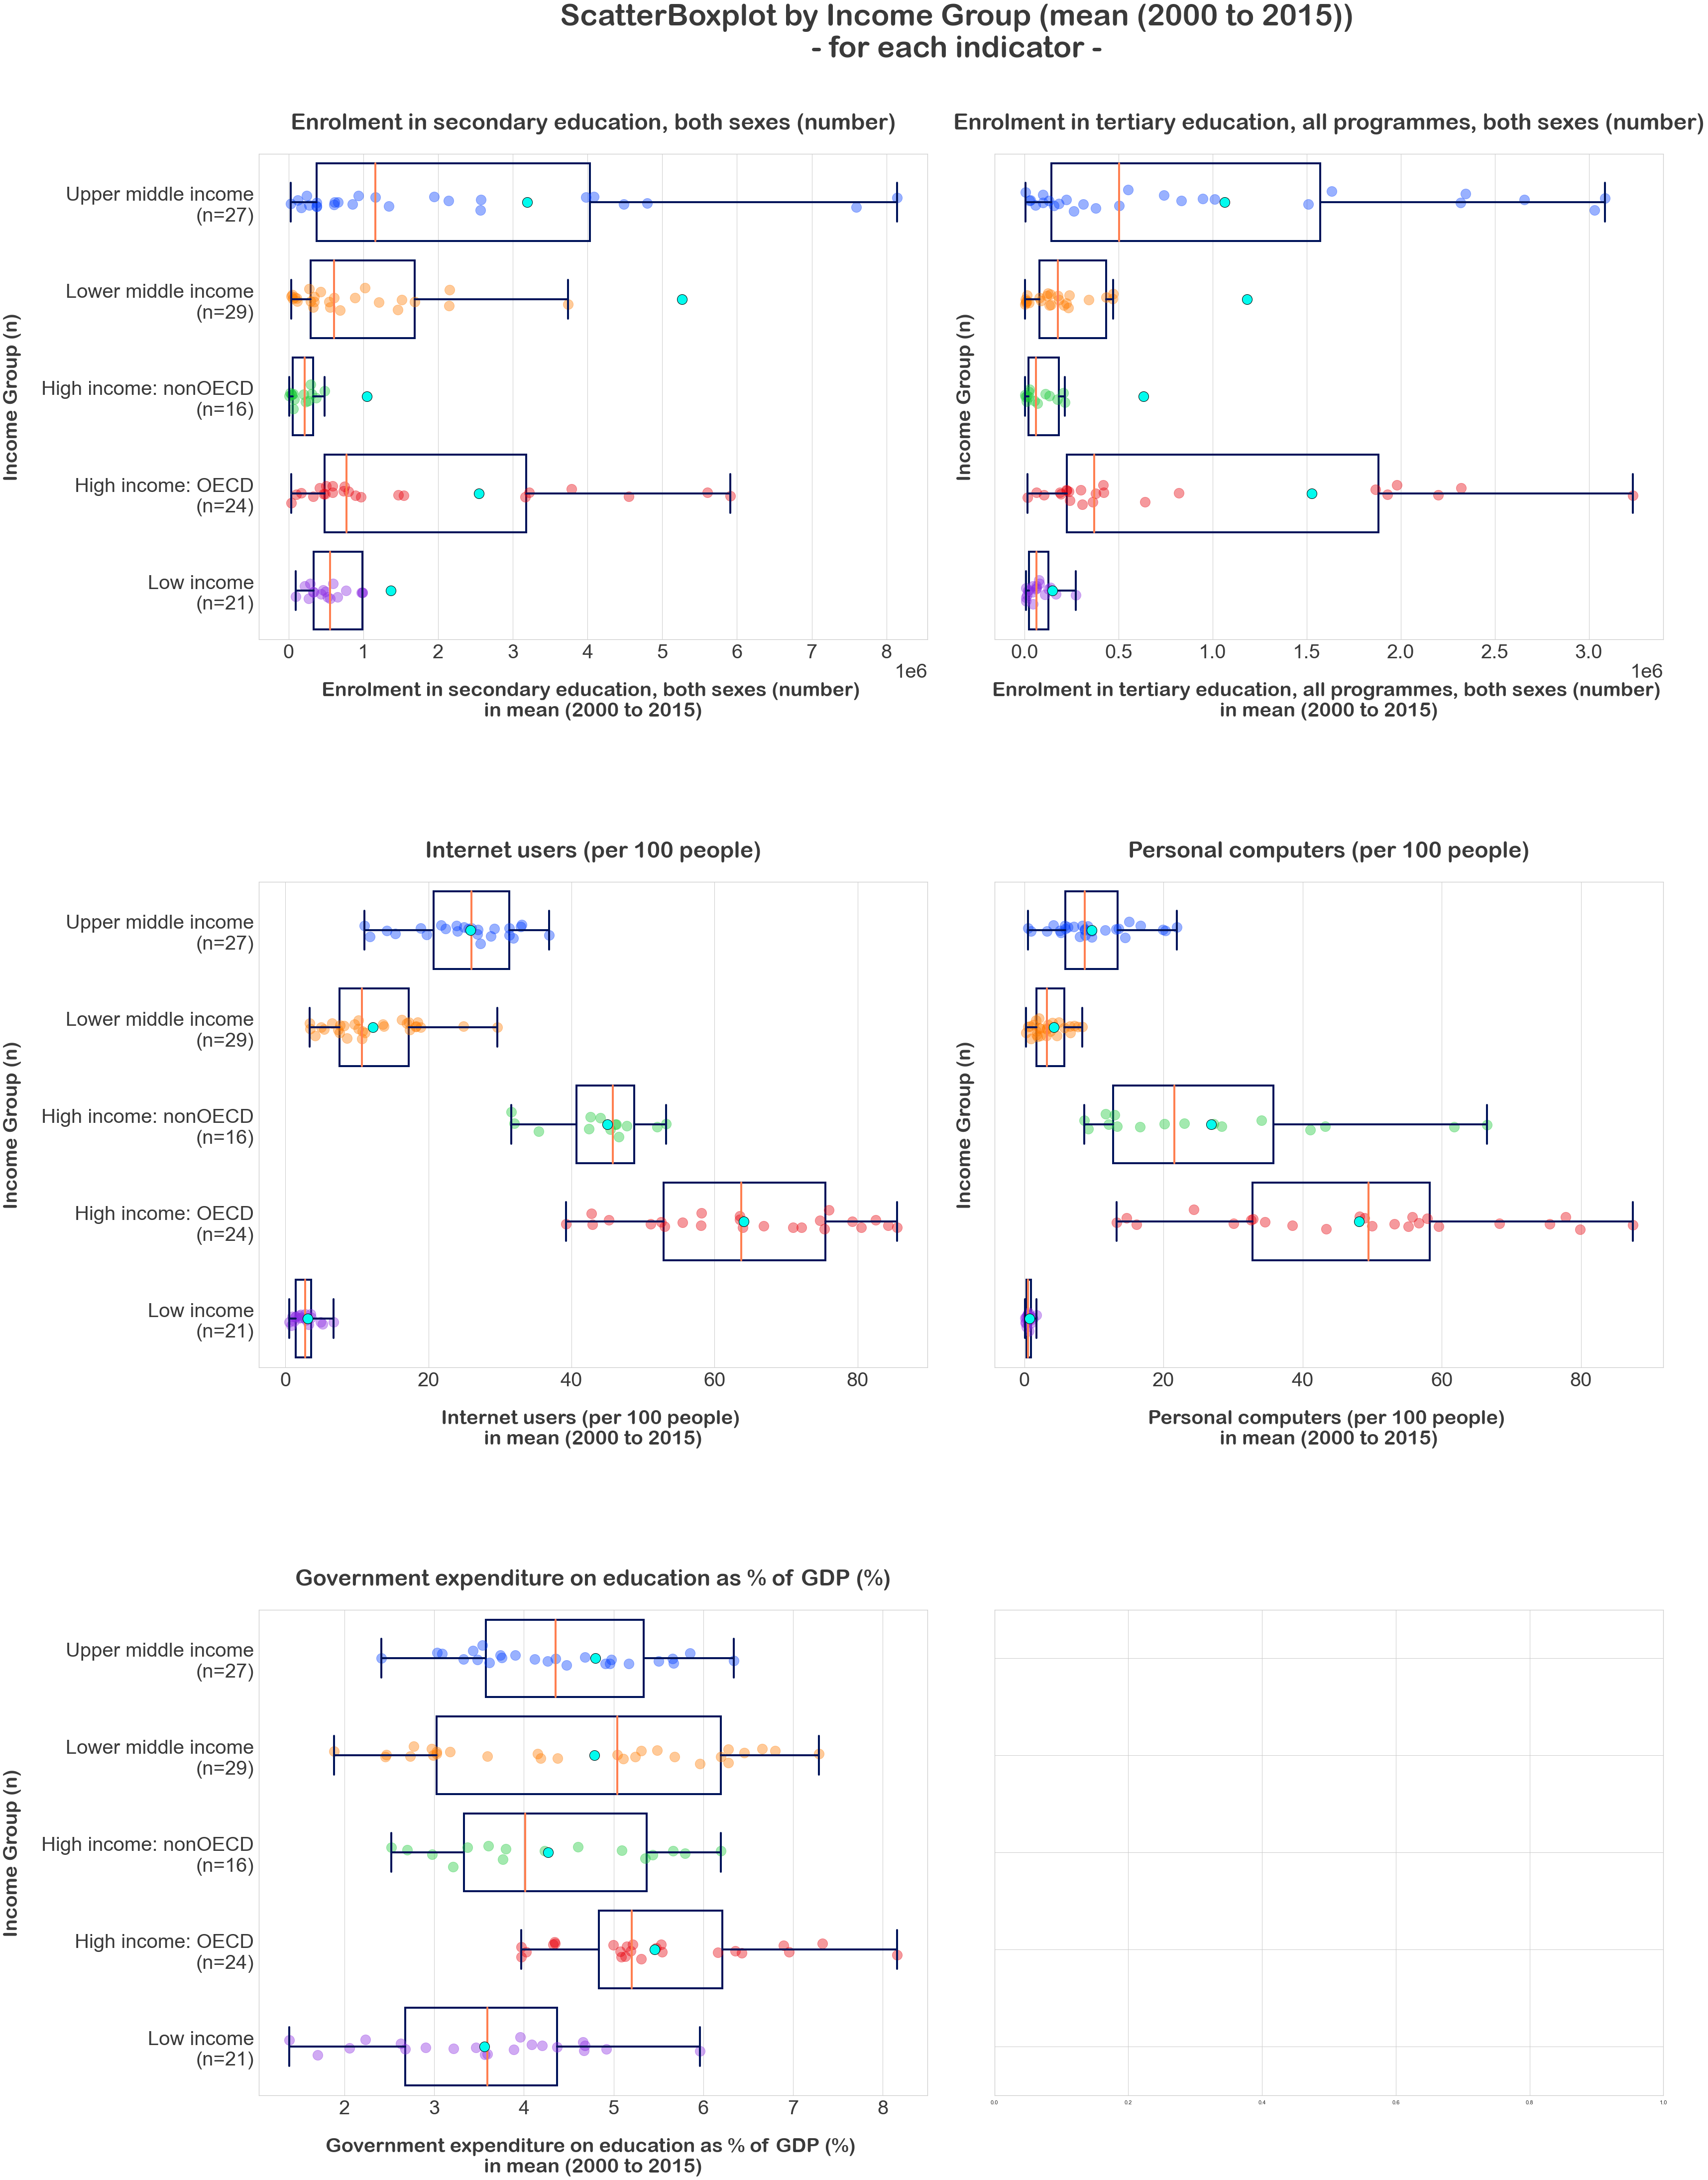

In [342]:
toolbox.plot_boxplot_by(data_education_stats_subset, 'Income Group', get_columns_year(data_education_stats_subset), 10, True)

<h2 style="font-family:Corbel; color:#737373">3. Scores d'attractivité </h2>

On souhaite identifier les pays ayant un fort potentiel économique pour notre client, voici la liste des critères que l'on recherche :

  - Nombre important d'étudiants (dans le secondaire et le tertiaire)
  - Nombre important de personnes ayant accès à internet
  - Nombre important de personnes ayant accès à un ordinateur personnel
  - Gouvernement qui investit beaucoup dans l'éducation

Méthodologie de calcul du score :
- pour chaque indicateur on calcule le rang centile du pays, i.e. la proportion des pays avec une valeur (pour l'indicateur) inférieure ou égale à celle du pays que l'on est en train de noter. 

Ex: pour l'indicateur "nombre d’élèves dans le secondaire", les états unis ont un score de 99 car ils se trouvent dans le dernier percentile, seule l’Inde a un nombre d’élèves plus élevé.  


- on fait la moyenne de ces 5 rangs centiles

### 3.1 Calcul du score

In [344]:
weight_dict = {'Internet users (per 100 people)' : 0.2, 'Personal computers (per 100 people)' : 0.2, 
               'Enrolment in secondary education, both sexes (number)' : 0.2,
               'Enrolment in tertiary education, all programmes, both sexes (number)' : 0.2, 
               'Government expenditure on education as % of GDP (%)' : 0.2}

score = toolbox.get_score(data_education_stats_subset, weight_dict, True)

Regardons les scores du Top 10 en 2015 (dernière année pour laquelle nous avons des valeurs) :

In [345]:
score.sort_values('SCORE_SYNTH_2015', ascending=False)[['SCORE_SYNTH_2015']].iloc[:10]

SCORE_SYNTH_2015
United Kingdom             89.80
United States              88.00
France                     86.20
Korea, Rep.                82.80
Netherlands                82.80
Sweden                     82.20
Brazil                     79.20
Belgium                    78.00
Saudi Arabia               77.40
Denmark                    77.00

### 3.2 Représentations graphiques

Le graphique ci-dessous permet d'observer l’évolution du potentiel des pays pour notre client, de voir pour un pays donné si son score est dans une dynamique descendante ou montante. 

Exemple d'analyse : quand on regarde l’évolution des scores de ce même top 10 entre 2000 et 2015, on voit que le score des USA diminue, tandis que celui du Brésil a beaucoup augmenté.

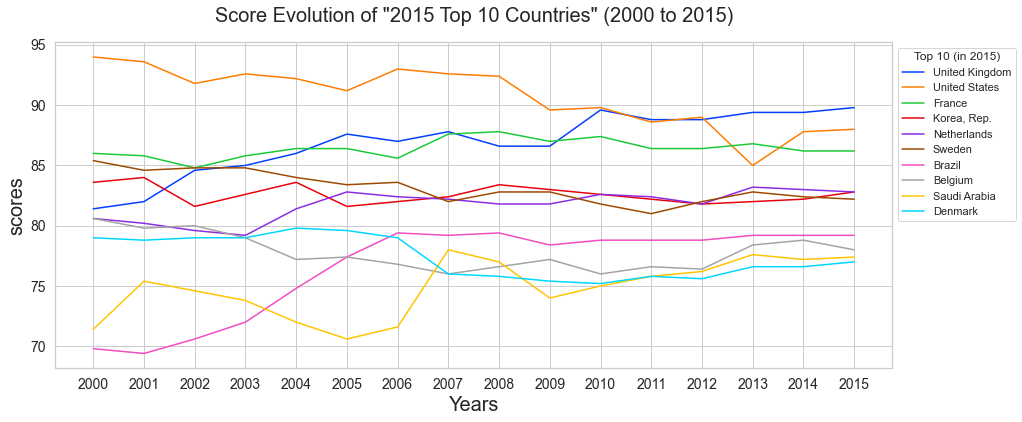

In [347]:
melted_subset = toolbox.reshape_score_dataset_tolineplot(score, '2015', 10)

plt.figure(figsize=(15,6))
sns.set_theme(style='whitegrid', palette='bright')
ax = sns.lineplot(data = melted_subset, x='Year', y='scores', hue='Top 10 (in 2015)')
plt.title('Score Evolution of "2015 Top 10 Countries" (2000 to 2015)', pad=20, fontsize=20)
plt.xlabel('Years', fontsize = 20)
plt.ylabel('scores', fontsize=20)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

Le graphique ci-dessous montre la distribution des scores obtenus en 2015. Cette distribution ressemble à une gaussienne : les scores sont bien répartis, pas tous concentrés dans un mouchoir de poche, on peut bien identifier quels pays se démarquent.

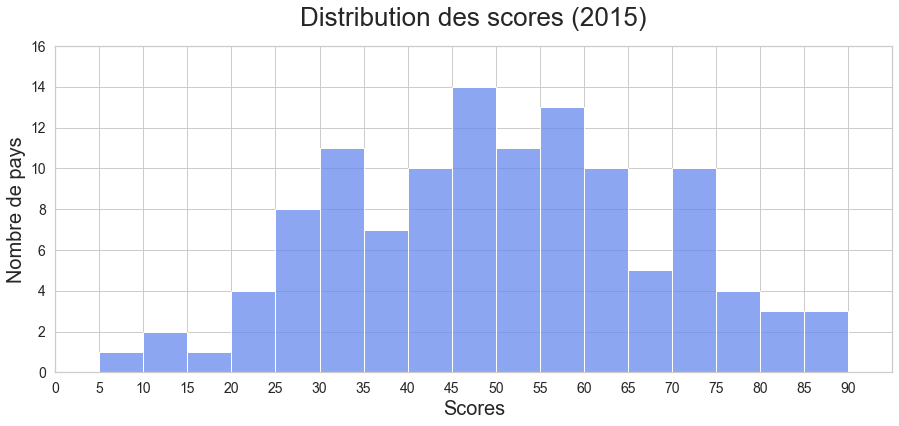

In [348]:
datahisto = score[['SCORE_SYNTH_2015']].reset_index()

sns.set_theme(palette='coolwarm', style='whitegrid')
plt.figure(figsize=(15,6))
sns.histplot(data=datahisto, x='SCORE_SYNTH_2015', bins = np.arange(5, 105, 5))

plt.xlabel('Scores', fontsize = 20)
plt.ylabel('Nombre de pays', fontsize=20)
plt.yticks(plt.yticks()[0], fontsize=14)
plt.xticks(np.arange(0, 95, 5), fontsize=14)
plt.xlim(0,95)
plt.title('Distribution des scores (2015)', pad=20, fontsize=26)

plt.show()

<h1 style="font-family:Corbel Light; color:#737373"><span style="color:#e54b87">Conclusion</span> sur la qualité du jeu de données et les pays dans lesquels s'implanter</h1>

Si on se place en 2022, les données ne sont pas de suffisamment bonne qualité pour être utilisées. Elles s’arrêtent à 2015, ce qui est trop éloigné dans le temps. 

Si on suppose, qu’on est proche de 2015, alors attention, il manque beaucoup de valeurs. On est obligé de nettoyer le jeu de données et donc de le fausser. 
En me basant sur ces données, je pense qu’il faut viser en priorité les pays d’Europe du nord (Royaume uni, Suede, Pays-Bas, Danemark) ; en amérique : les Etats-uni au nord, le Brésil au sud ; en asie : la Corée du sud et enfin l’Arabie Saoudite. 